# 问题背景

海藻散布于江河湖海之中，几乎随处可见。关注日常新闻的话，海藻偶尔还能上头条，不过一般不是什么好事情，比如太湖流域蓝藻污染、巢湖藻患。有些藻类在小水体和潜水湖泊中大量繁殖，引起“水华”现象（water blooms）。水华发生时，水体一般呈蓝色或绿色。 

<img src=figtabs/ch7/algae_pic.png align=center width=50% height=50% />

  
藻类不仅生长在淡水中，海水中因为藻类爆发性增殖或高度聚集而引起水体变色，常见的是赤潮。赤潮来袭，蔚为壮观。
不管是淡水中的水华，还是海水中的赤潮，都是有害的生态现象。比如曾有报道，“2007年蓝藻大暴发后，中国有史以来最昂贵的治湖工程随即展开。七年已过，千亿元投资之后，成功仍远”，“对于太湖而言，若对藻患不加以治理，将会因全部富营养化而‘窒息死亡’”。“自来水臭了两天没澡洗、无锡闹水荒让市民洗漱成了问题”。<br>
对于藻类的研究，当然可以从植物学、生态学、环境学的角度，对其成因机理加以剖析。比如，有学者将浅水湖泊视为多输入和多输出的定常或时变系统，该系统特征可由一系列含状态变量的微分方程来描述：<br>
$\begin{array}{l}
\frac{{\partial A\left( t \right)}}{{\partial t}} = \left( {u\left( t \right) - Ma\left( t \right) - \frac{Q}{V}} \right) \times A\left( t \right) - GP\left( t \right) \times Zoo\left( t \right)\\
\frac{{\partial TP\left( t \right)}}{{\partial t}} = {P_{in}}\left( t \right) + {P_{re}} - {P_{se}} + Ma\left( t \right) \times A\left( t \right) \times A{P_0} - UP\left( t \right) \times A\left( t \right) - \frac{Q}{V} \times TP\left( t \right)\\
u\left( t \right) = {u_{\max }} \times f\left( {T\left( t \right)} \right) \times f\left( {L\left( t \right)} \right) \times f\left( {TN\left( t \right)} \right) \times f\left( {TP\left( t \right)} \right)\\
f\left( {T\left( t \right)} \right) = \exp \left( { - \frac{{2.3}}{{15}} \times \left| {T\left( t \right) - {T_{opt}}} \right|} \right)\\
f\left( {L\left( t \right)} \right) = \frac{{L\left( t \right)}}{{L\left( t \right) + KL}}\\
f\left( {TN\left( t \right)} \right) = \frac{{TN\left( t \right)}}{{TN\left( t \right) + KN}}\\
f\left( {TP\left( t \right)} \right) = \frac{{TP\left( t \right)}}{{TP\left( t \right) + KP}}
\end{array}$<br>

许秋瑾等. 太湖藻类生长模型研究. 湖泊科学 2001, 13(2):149-157.

---

从机理的角度进行剖析，并且进行模拟预测，毫无疑问对于水华的控制和管理来讲是大有裨益的。不过，咱们现在遵循的是另一种研究范式：数据驱动。  
微软在The Fourth Paradigm :Data-Intensive Scientific Discovery 中指出，科学研究的范式包括四个:几千年前, 是经验科学, 主要用来描述自然现象;几百年前, 是理论科学, 使用模型或归纳法进行科学研究;几十年前, 是计算科学, 主要模拟复杂的现象;今天是数据探索, 统一于理论、实验和模拟。  
所以，我们这个实验，是从纯数据的角度出发，对藻类的数量进行预测分析。我们不需要从物理学、植物学或是生态学本身的原理出发，对其动力学过程或是机理模型进行解析表达。而是采用数据挖掘中的分类与回归方法，或者说机器学习中的有监督学习方法，对藻类数量进行预测分析。

本实验目的比较明确，就是通过传感器得到的化学成分数据，来预测海藻a1~a7出现的频次。从关系的角度讲，无非是寻找环境变量season, size, speed， 化学监测参量mxPH, mnO2, Cl, NO3, NH4, oPO4, PO4, Chla与海藻a1~a7的映射关系。用数据挖掘的角度看，是一个典型的回归问题（因为这些因变量a1~a7均为数值型变量）；从机器学习的角度讲，是一个典型的有监督学习问题。

# 实验流程

数据挖掘的过程，大体遵循以下流程，本实验也不例外：
<img src=figtabs/ch7/crisp_dm.png align=center width=30% height=30% />

在前述已基本了解问题背景的情况下，接下来通过探索性数据分析，对数据有一个初步的认识。

# 探索性数据分析

## 数据获取

本案例用到的数据集来自于ERUDIT研究网络，并被用于1999年的CoIL国际数据分析竞赛。  
数据集包含18个字段，含义如下：  
* season：季节
* size：河流大小
* speed：水流速度
* mxPH：最大pH值
* mnO2：最小含氧量
* Cl：平均氯化物含量
* NO3：平均硝酸盐含量
* NH4：平均氨含量
* oPO4：平均正磷酸盐含量
* PO4：平均磷酸盐含量
* Chla：平均叶绿素含量
* a1~a7：algae1~algae7，是藻类的种群分布，若取值为0，则表明出现的频率低。  

---

数据集由三个文件组成：
* analysis.data Training data for the competition (30K)
* eval.data Evaluation data (without algae concentrations) (12K)
* results.data Evaluation data (with algae concentrations) (20K)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
favorable_figsize = (10, 6)

忽略掉一些警告，保持界面整洁：

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
data_folder = os.path.join("datasets", "algae")
Xy_train_file = os.path.join(data_folder, "analysis.data")
test_Xy_file = os.path.join(data_folder, "results.data")

In [4]:
Xy_train = pd.read_csv(Xy_train_file,
                        header=None,
                        na_values='XXXXXXX',
                      encoding = 'utf-8')
Xy_train.columns = ['season', 'size', 'speed', 'mxPH', 'mnO2',
                     'Cl', 'NO3', 'NH4', 'oPO4', 'PO4', 'Chla',
                     'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
Xy_train.head()

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,winter,small_,medium,8.00,9.8,60.800,6.23800,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small_,medium,8.35,8.0,57.750,1.28800,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small_,medium,8.10,11.4,40.020,5.33000,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small_,medium,8.07,4.8,77.364,2.30200,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small_,medium,8.06,9.0,55.350,10.41600,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0


In [5]:
Xy_test = pd.read_csv(test_Xy_file,
                        header=None,
                        na_values='XXXXXXX')
Xy_test.columns = ['season', 'size', 'speed', 'mxPH', 'mnO2',
                     'Cl', 'NO3', 'NH4', 'oPO4', 'PO4', 'Chla',
                     'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
Xy_test.head()

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,summer,small_,medium,7.95,5.7,57.333,2.46000,273.33301,295.66699,380.000,NaN,1.2,36.5,1.9,0.0,1.2,0.0,28.0
1,winter,small_,medium,7.98,8.8,59.333,7.39200,286.66699,33.33300,138.000,7.1,1.2,0.0,0.0,0.0,23.2,46.4,0.0
2,summer,small_,medium,8.00,7.2,80.000,1.95700,174.28600,47.85700,113.714,4.5,7.0,23.0,6.5,1.4,21.2,0.0,2.1
3,spring,small_,high__,8.35,8.4,68.000,3.02600,458.00000,45.20000,111.800,3.2,1.4,38.2,2.4,0.0,4.8,1.0,1.2
4,spring,small_,medium,8.10,13.2,19.000,0.00000,130.00000,6.00000,40.000,2.0,3.9,55.4,8.4,0.0,0.0,0.0,0.0


In [6]:
cols = Xy_train.columns
cols_y = ['a'+str(x) for x in range(1, 8)]
cols_X = list(set(cols) - set(cols_y))
cols_dummy = ['season', 'size', 'speed']

In [7]:
cols

Index(['season', 'size', 'speed', 'mxPH', 'mnO2', 'Cl', 'NO3', 'NH4', 'oPO4',
       'PO4', 'Chla', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7'],
      dtype='object')

In [8]:
cols_y

['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']

In [9]:
cols_X

['oPO4',
 'speed',
 'mxPH',
 'mnO2',
 'NH4',
 'Chla',
 'size',
 'season',
 'Cl',
 'PO4',
 'NO3']

In [10]:
cols_dummy

['season', 'size', 'speed']

## 数据的分布形态

要刻画数据分布的形态，首先是观数以形，通过几何的方法进行直观上的展示，比如利用最基本的matplotlib来实现对mxPH的刻画：

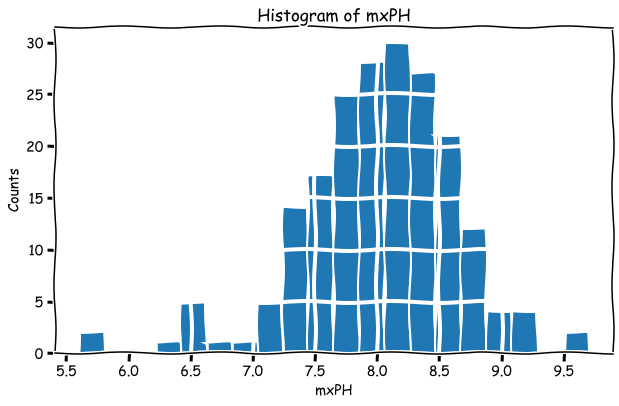

In [11]:
plt.figure(figsize = favorable_figsize)
plt.xkcd()
Xy_train.mxPH.plot.hist(grid=True,
                        bins=20,
                        rwidth=0.9)
plt.title('Histogram of mxPH')
plt.xlabel('mxPH')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
#好吧，这种漫画风格到此为止
# Remove XKCD mode:
plt.rcdefaults()

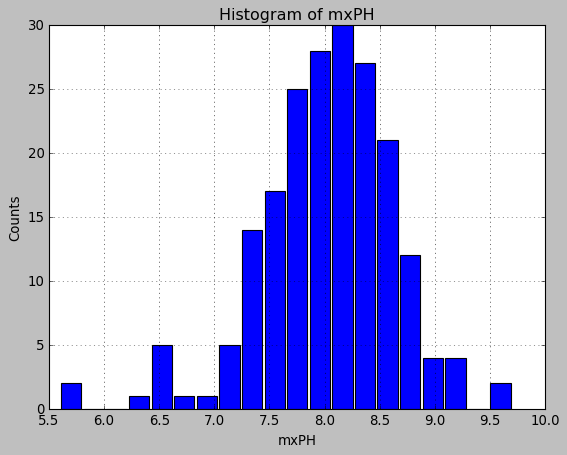

In [12]:
import matplotlib.pyplot as plt
figsize = favorable_figsize
plt.style.use('classic')  # classic, grayscale,19
Xy_train.mxPH.plot.hist(grid=True,
                        bins=20,
                        rwidth=0.9)
plt.title('Histogram of mxPH')
plt.xlabel('mxPH')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()

直接利用pandas提供的方法也可以：

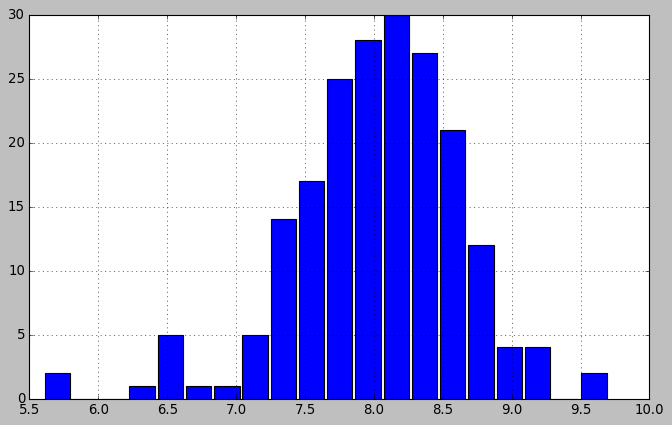

In [13]:
Xy_train.mxPH.hist(bins=20,
                   rwidth=0.9,
                   figsize=favorable_figsize)

利用seaborn，可能效果会更好一点，比如将概率密度曲线和直方图绘制在一张图上：

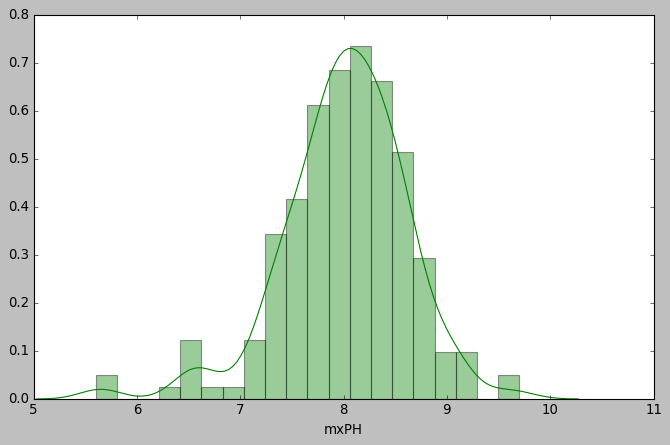

In [14]:
plt.figure(figsize=favorable_figsize)
sns.distplot(Xy_train.mxPH,color="g", bins=20)

PH值总体上并非呈中性，而是呈现弱碱性。这也反映出取样河流酸碱值的总体状况。

以下是反映数据分布的一些统计量：<br>

---

反映数据的集中趋势：<br>
$\bar x = \frac{1}{m}\sum\limits_{i = 1}^m {{x_i}}$<br>
$median\left( x \right) = \frac{1}{2}\left( {{x_{\left\lceil {\frac{m}{2}} \right\rceil }} + {x_{\left\lceil {\frac{{m + 1}}{2}} \right\rceil }}} \right)$<br>

---

反映数据分散的程度：<br>
$range\left( x \right) = \max \left( x \right) - \min \left( x \right)$<br>
$IQR\left( x \right) = Q3\left( x \right) - Q1\left( x \right)$<br>
$std = \sqrt {\frac{1}{{m - 1}}\sum\limits_{i = 1}^m {{{\left( {{x_i} - \bar x} \right)}^2}} } $

In [15]:
print('mxPH最小值: {:.2f}'.format(Xy_train.mxPH.min()))
print('mxPH中位数: {:.2f}'.format(Xy_train['mxPH'].median()))
print('mxPH均值: {:.2f}'.format(Xy_train.mxPH.mean()))
print('mxPH最大值:{:.2f}'.format(Xy_train.mxPH.max()))

mxPH最小值: 5.60
mxPH中位数: 8.06
mxPH均值: 8.01
mxPH最大值:9.70


In [16]:
print('mxPH极差:{:.2f}'.format(np.ptp(Xy_train.mxPH)))
print('mxPH标准差:{:.2f}'.format(np.std(Xy_train.mxPH)))
print('mxPH方差:{:.2f}'.format(np.var(Xy_train.mxPH)))
print('mxPH变异系数:{:.2f}'.format(np.std(Xy_train.mxPH) / np.mean(Xy_train.mxPH)))

mxPH极差:nan
mxPH标准差:0.60
mxPH方差:0.36
mxPH变异系数:0.07


以下通过numpy来实现fivenum：

In [17]:
np.percentile(Xy_train.mxPH.dropna(), [0, 25, 50, 75, 100])

array([5.6 , 7.7 , 8.06, 8.4 , 9.7 ])

叠加到现有图形之中：

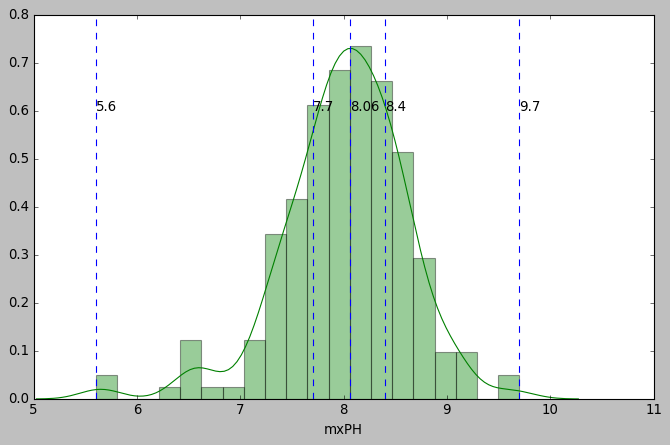

In [18]:
plt.figure(figsize=favorable_figsize)
sns.distplot(Xy_train.mxPH,color="g", bins=20)
for v in np.percentile(Xy_train.mxPH.dropna(), [0, 25, 50, 75, 100]):
    plt.axvline(v, linestyle="--")
    plt.text(v, plt.ylim()[1] * 0.75, v)

也可以进一步计算偏度(skewness)和峰度(kurtosis)：  


In [19]:
print('skew of mxPH: {:.2f}'.format(Xy_train.mxPH.skew()))
print('kurt of mxPH:{:.2f}'.format(Xy_train.mxPH.kurt()))

skew of mxPH: -0.74
kurt of mxPH:2.14


河流大小与PH值是否有关系呢？

In [20]:
Xy_train.columns

Index(['season', 'size', 'speed', 'mxPH', 'mnO2', 'Cl', 'NO3', 'NH4', 'oPO4',
       'PO4', 'Chla', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7'],
      dtype='object')

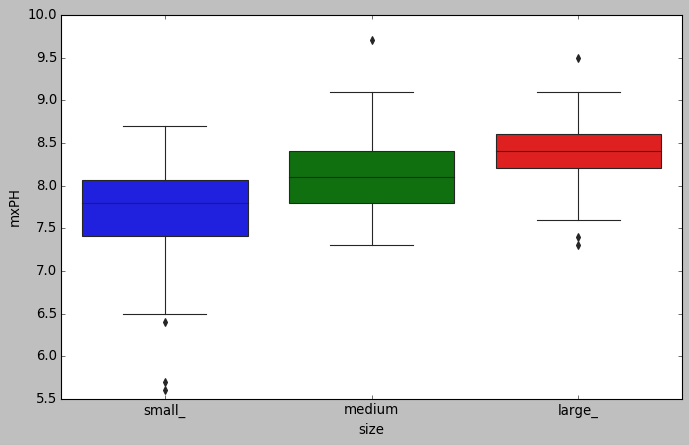

In [21]:
plt.figure(figsize=favorable_figsize)
sns.boxplot(x = 'size',
           y = 'mxPH',
           data = Xy_train)

显然，差别还是挺大的。我们可以进一步通过分组统计功能，来得到他们准确的数值：

In [22]:
Xy_train.mxPH.groupby(Xy_train['size']).mean()

size
large_    8.396444
medium    8.101250
small_    7.657000
Name: mxPH, dtype: float64

In [23]:
Xy_train.mxPH.groupby(Xy_train['size']).agg([('最大值', 'max'),
                                             ('中位数', 'median'),
                                             ('均值', 'mean'),
                                             ('最小值', 'min'),
                                            ('标准差', np.std)])

,最大值,中位数,均值,最小值,标准差
size,,,,,
large_,9.5,8.400,8.396444,7.3,0.419779
medium,9.7,8.100,8.101250,7.3,0.484533
small_,8.7,7.795,7.657000,5.6,0.631271


自己写可能觉得比较麻烦，直接用describe当然也是可以的：

In [24]:
Xy_train.mxPH.groupby(Xy_train['size']).describe()

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
large_,45.0,8.396444,0.419779,7.3,8.20,8.400,8.6000,9.5
medium,84.0,8.101250,0.484533,7.3,7.80,8.100,8.4075,9.7
small_,70.0,7.657000,0.631271,5.6,7.41,7.795,8.0675,8.7


较之于PH值，我们可能更想知道河流大小是否真的会影响藻类数量：

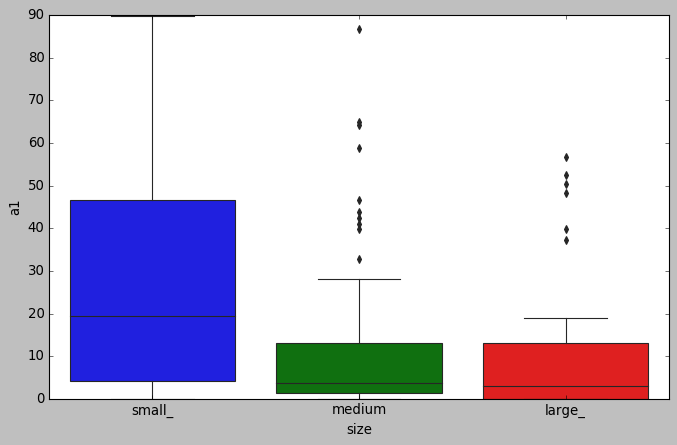

In [25]:
plt.figure(figsize=favorable_figsize)
sns.boxplot(x = 'size',
           y = 'a1',
           data = Xy_train)

季节呢？

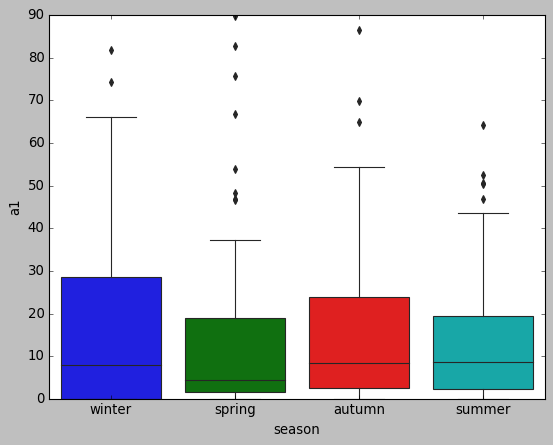

In [26]:
sns.boxplot(x = 'season',
           y = 'a1',
           data = Xy_train)

<Figure size 4800x2700 with 0 Axes>

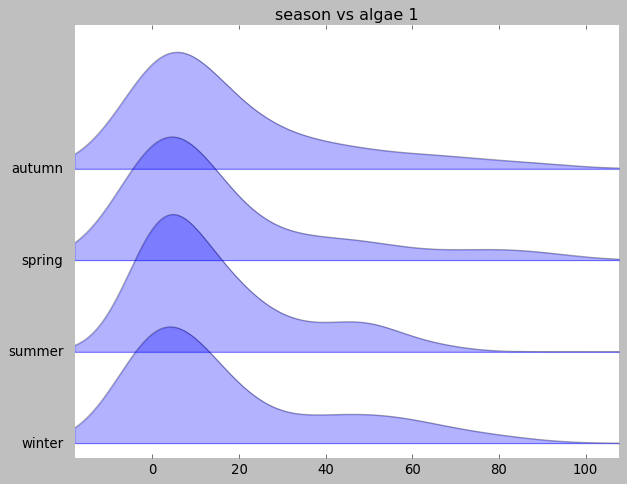

In [27]:
import joypy
plt.figure(figsize = (16, 9), dpi = 300)
fig, axes = joypy.joyplot(Xy_train,
                           column = 'a1',
                           by = 'season',
                         alpha = 0.3)
plt.title('season vs algae 1')
plt.show()

看来藻类与季节无关？也不尽然，只能说a1与季节关系不大，我们再来看看a3：

<Figure size 4800x2700 with 0 Axes>

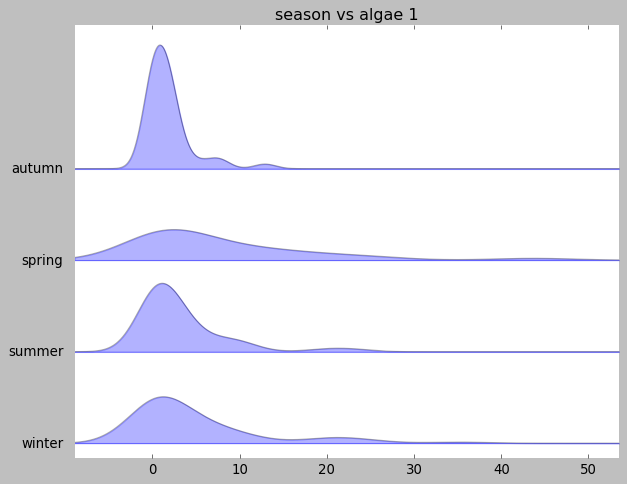

In [28]:
import joypy
plt.figure(figsize = (16, 9), dpi = 300)
fig, axes = joypy.joyplot(Xy_train,
                           column = 'a3',
                           by = 'season',
                         alpha = 0.3)
plt.title('season vs algae 1')
plt.show()

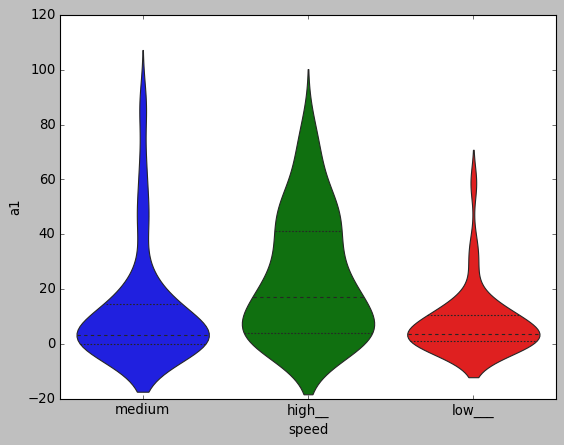

In [29]:
sns.violinplot(x = 'speed',
               y = 'a1',
               data = Xy_train,
               scale = 'width',
               inner = 'quartile')

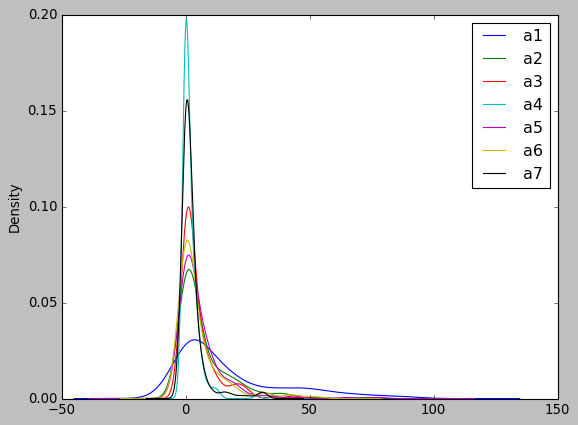

In [30]:
Xy_train[cols_y].plot(kind = 'density')

In [31]:
Xy_train.shape

(200, 18)

mxPH       AxesSubplot(0.125,0.664706;0.133621x0.235294)
mnO2    AxesSubplot(0.285345,0.664706;0.133621x0.235294)
Cl       AxesSubplot(0.44569,0.664706;0.133621x0.235294)
NH4     AxesSubplot(0.606034,0.664706;0.133621x0.235294)
oPO4    AxesSubplot(0.766379,0.664706;0.133621x0.235294)
PO4        AxesSubplot(0.125,0.382353;0.133621x0.235294)
Chla    AxesSubplot(0.285345,0.382353;0.133621x0.235294)
a1       AxesSubplot(0.44569,0.382353;0.133621x0.235294)
a2      AxesSubplot(0.606034,0.382353;0.133621x0.235294)
a3      AxesSubplot(0.766379,0.382353;0.133621x0.235294)
a4              AxesSubplot(0.125,0.1;0.133621x0.235294)
a5           AxesSubplot(0.285345,0.1;0.133621x0.235294)
a6            AxesSubplot(0.44569,0.1;0.133621x0.235294)
a7           AxesSubplot(0.606034,0.1;0.133621x0.235294)
dtype: object

<Figure size 800x480 with 0 Axes>

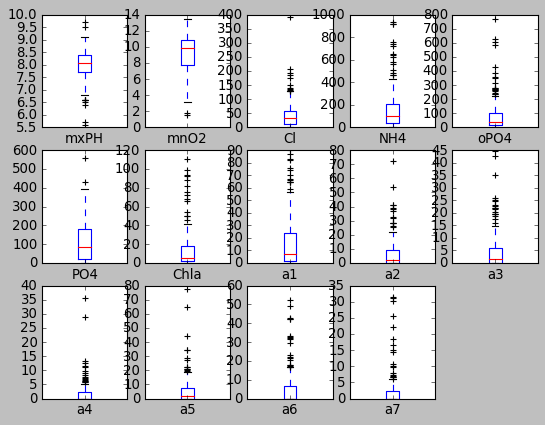

In [32]:
plt.figure(figsize=favorable_figsize)
Xy_train.plot(kind='box',
              subplots=True,
              layout=(3, 5))

## 变量之间的相关性

In [33]:
cols_a1 = ['a1']
cols_a1.extend(cols_X)
print(cols_a1)

['a1', 'oPO4', 'speed', 'mxPH', 'mnO2', 'NH4', 'Chla', 'size', 'season', 'Cl', 'PO4', 'NO3']


In [34]:
Xy_train[cols_y].corr()

,a1,a2,a3,a4,a5,a6,a7
a1,1.000000,-0.285024,-0.172356,-0.050251,-0.259657,-0.271354,-0.231333
a2,-0.285024,1.000000,0.011591,-0.181733,-0.139189,-0.078918,0.055681
a3,-0.172356,0.011591,1.000000,0.024657,-0.123297,-0.161568,0.056209
a4,-0.050251,-0.181733,0.024657,1.000000,0.087898,-0.094592,0.033420
a5,-0.259657,-0.139189,-0.123297,0.087898,1.000000,0.302890,-0.014705
a6,-0.271354,-0.078918,-0.161568,-0.094592,0.302890,1.000000,0.018160
a7,-0.231333,0.055681,0.056209,0.033420,-0.014705,0.018160,1.000000


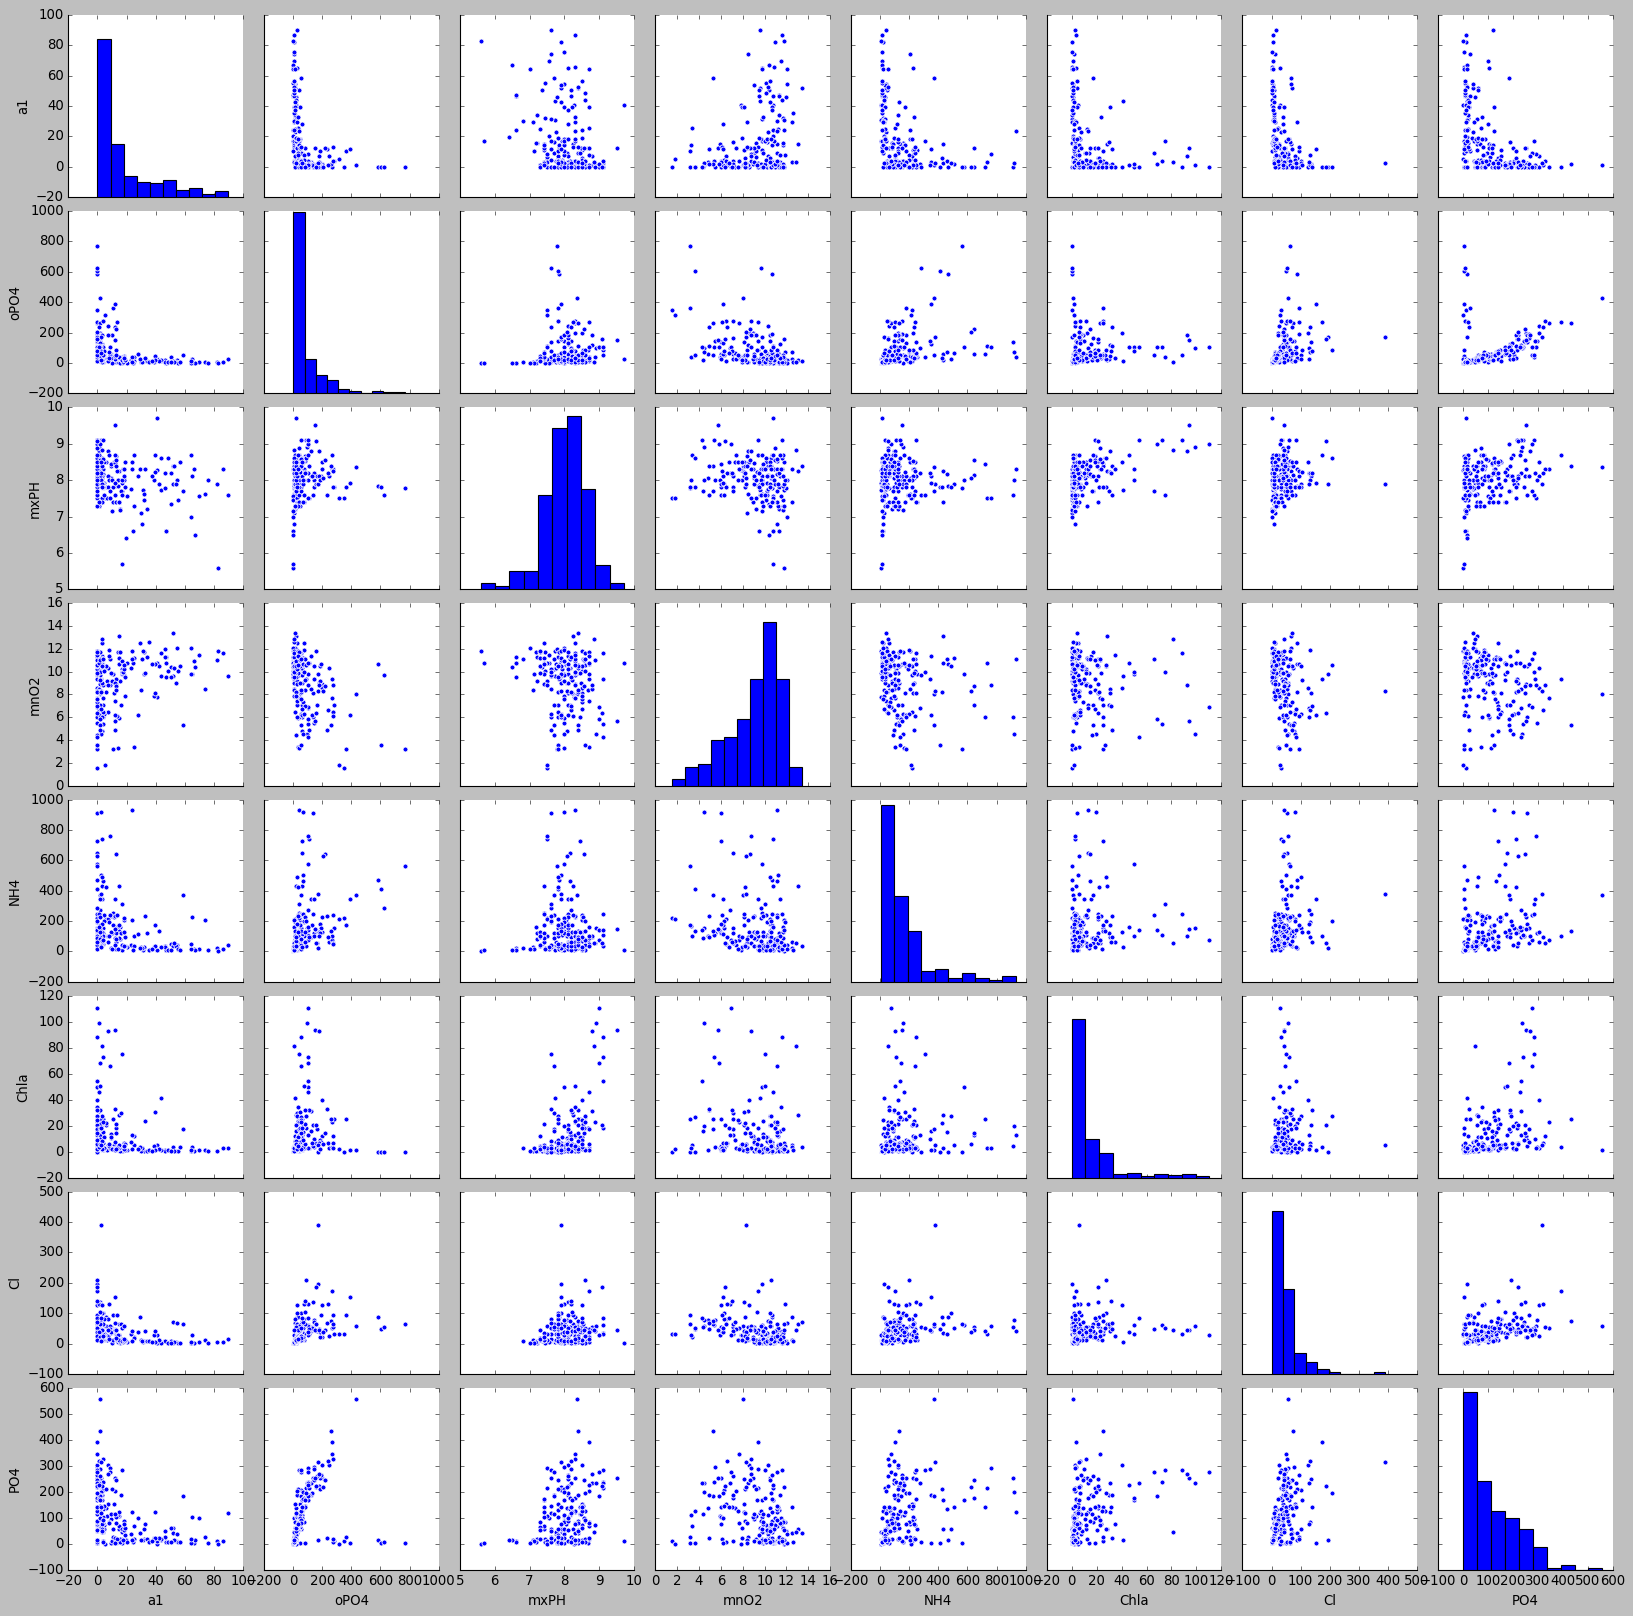

In [35]:
sns.pairplot(Xy_train[cols_a1])

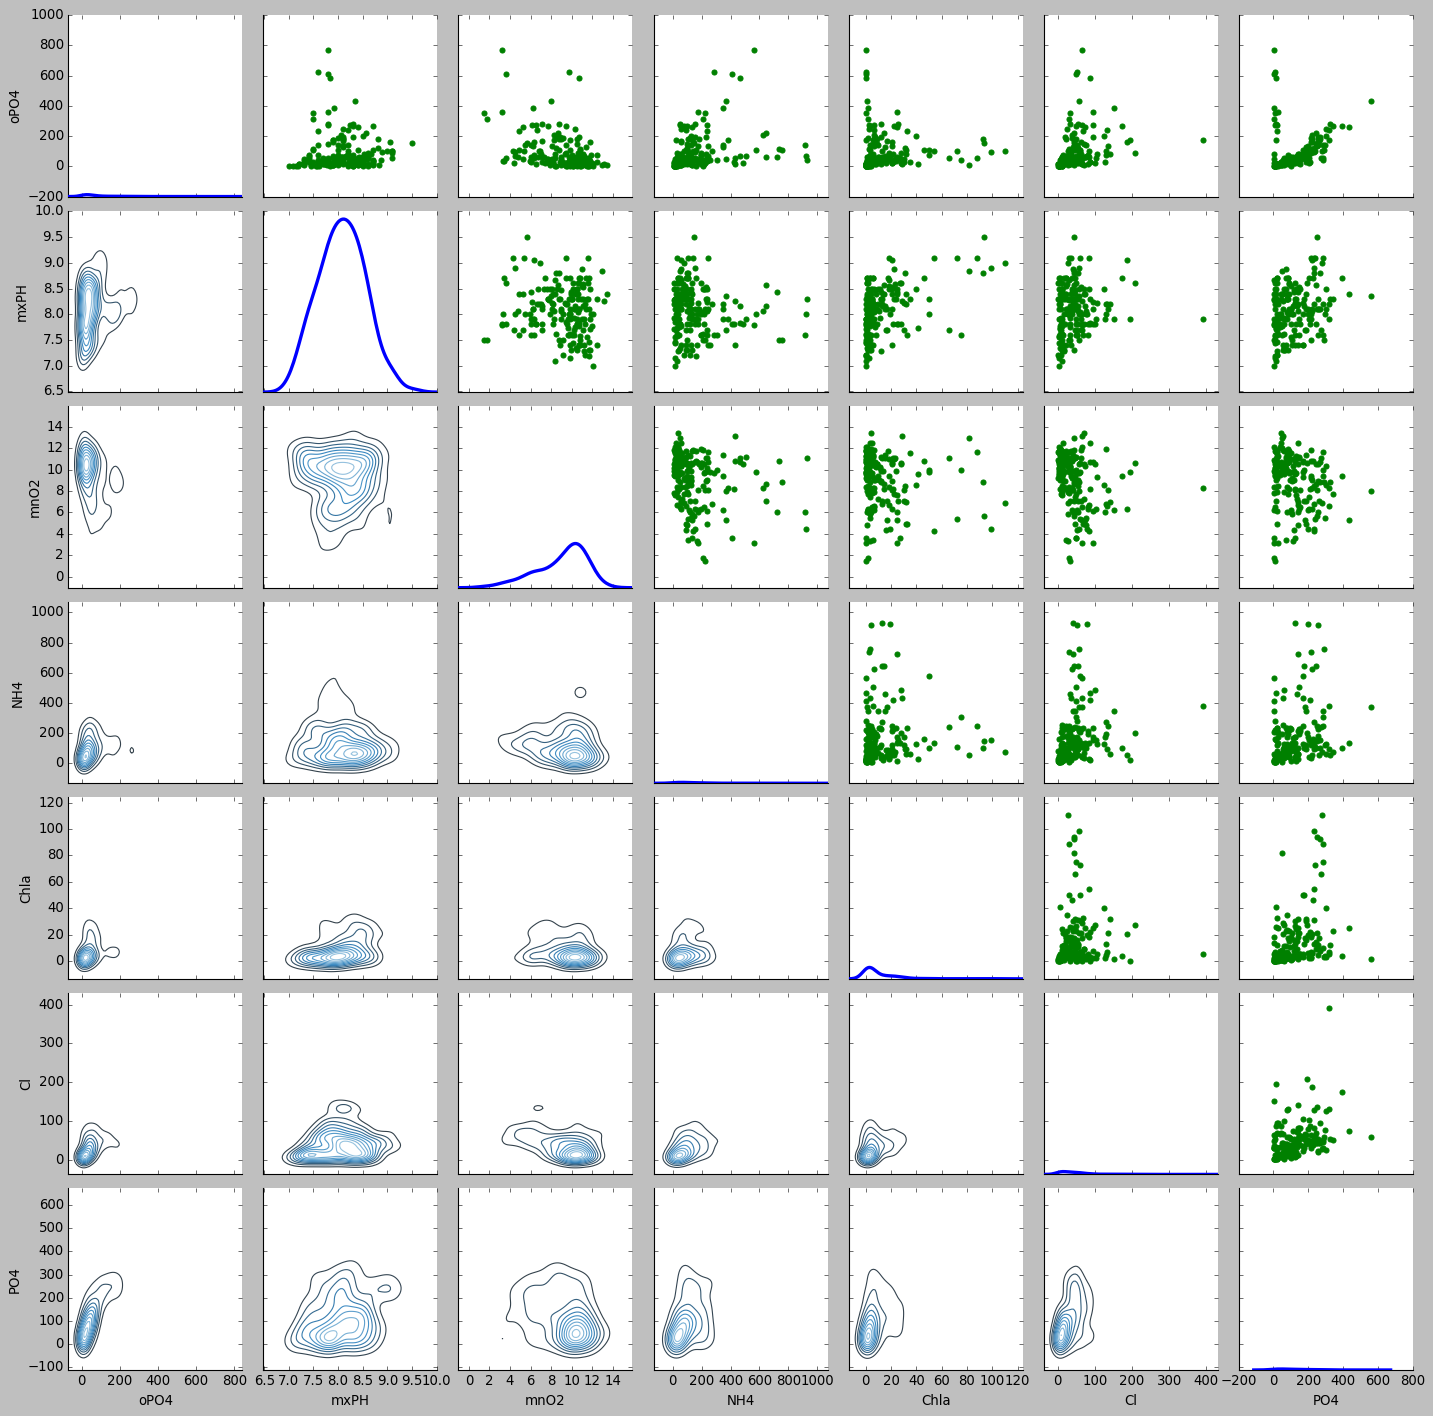

In [36]:
g = sns.PairGrid(Xy_train[cols_X].dropna())
g.map_diag(sns.kdeplot, lw=3) #设置对角线图表
g.map_upper(plt.scatter, color = 'green')  #设置对角线上端图表
g.map_lower(sns.kdeplot, cmap='Blues_d') #设置对角线下端图表

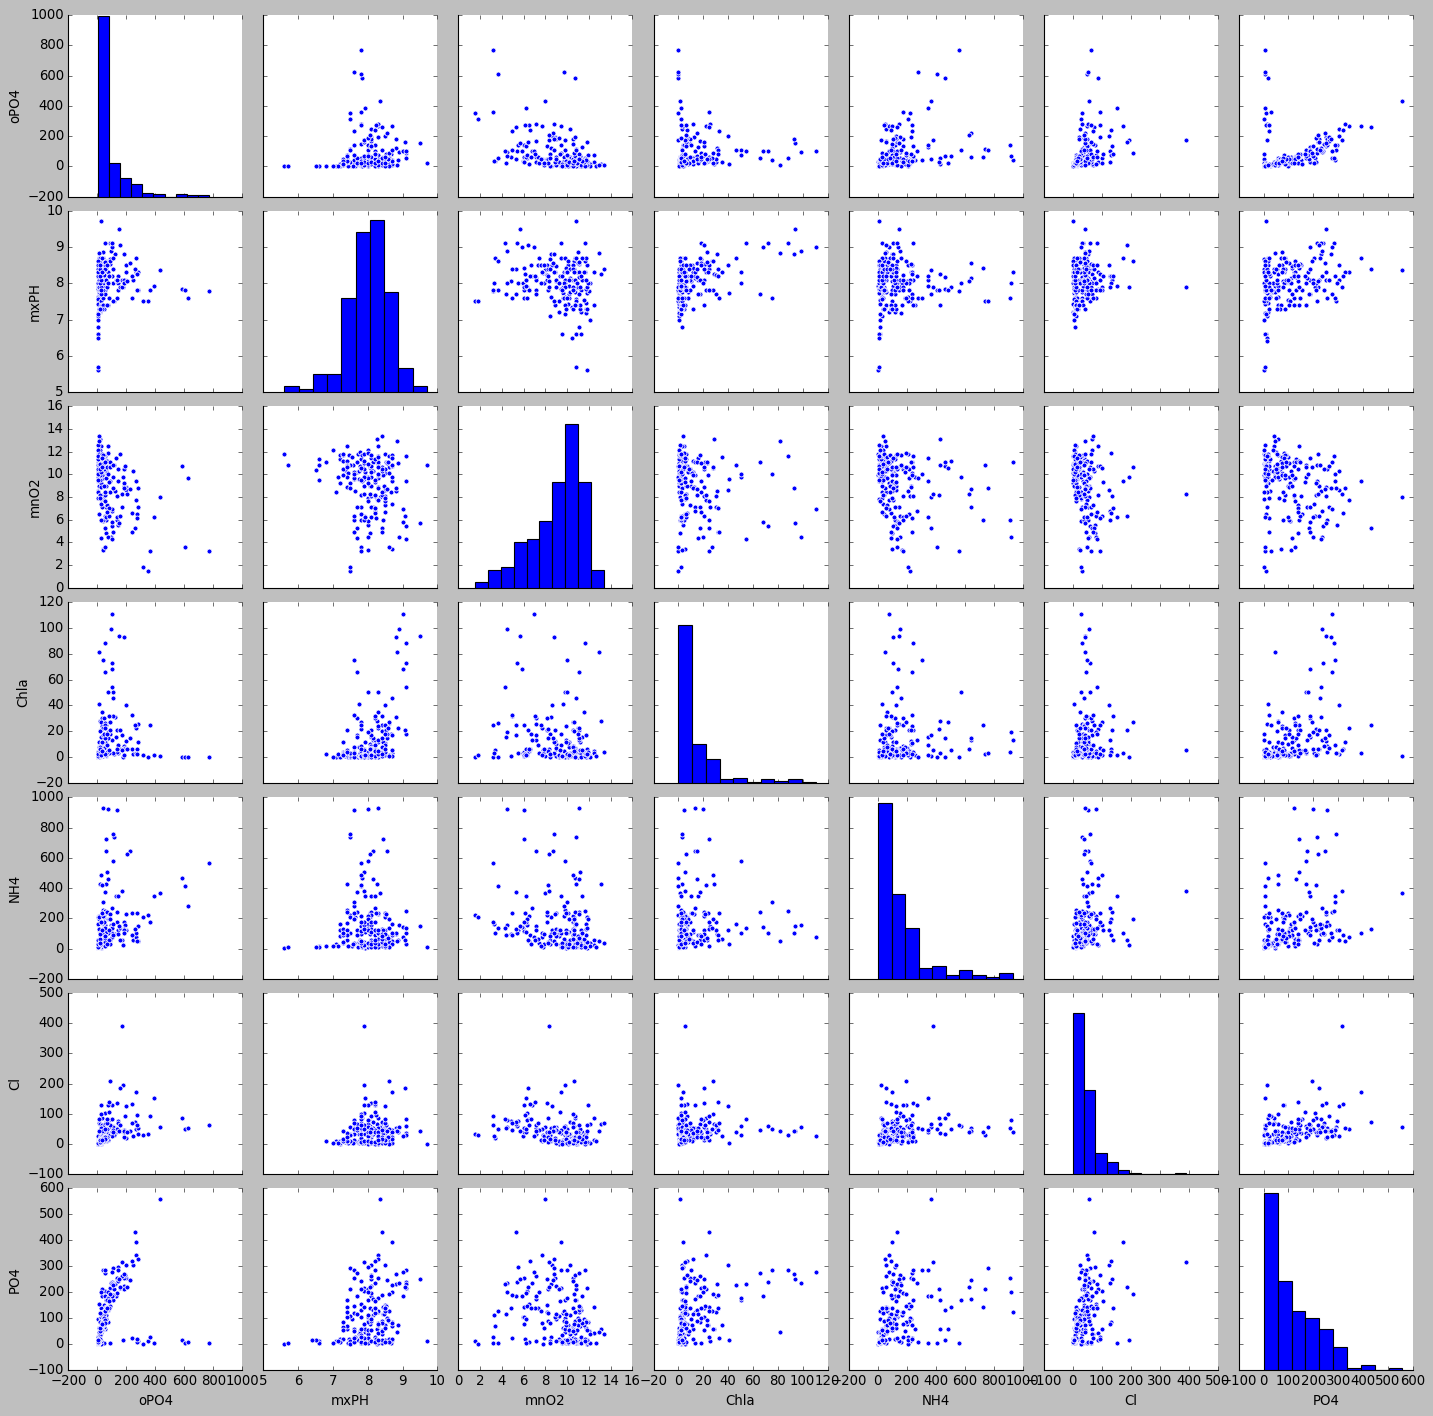

In [37]:
cols_numeric = list(set(cols_X) - set(cols_dummy))
sns.pairplot(Xy_train[cols_numeric])

In [38]:
Xy_train_cols_numeric_corr = Xy_train[cols_numeric].corr() 
Xy_train_cols_numeric_corr  = Xy_train_cols_numeric_corr - np.identity(Xy_train_cols_numeric_corr.shape[0])
#Xy_train_cols_numeric_corr  = Xy_train_cols_numeric_corr - np.diag([1]*Xy_train_cols_numeric_corr.shape[0])

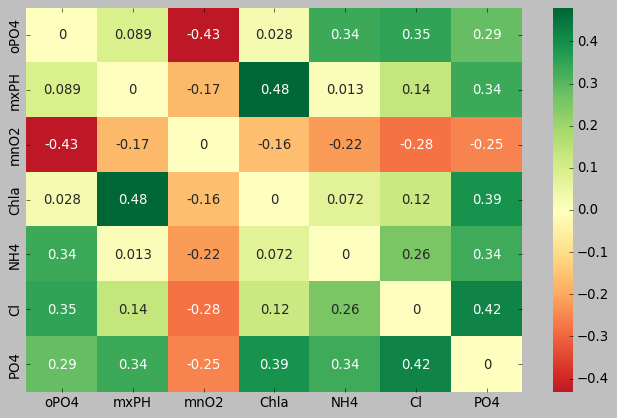

In [39]:
plt.figure(figsize=favorable_figsize)
sns.heatmap(Xy_train_cols_numeric_corr,
           xticklabels = Xy_train_cols_numeric_corr.columns,
            yticklabels = Xy_train_cols_numeric_corr.columns,
            cmap = 'RdYlGn',
            center = 0,
            annot = True)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

从以上结果可以看出，自变量之间的相关系数并不高。最相关的，也只是oPO4与mnO2，为-0.43

In [40]:
Xy_train.corr()

,mxPH,mnO2,Cl,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
mxPH,1.000000,-0.168612,0.136108,0.012908,0.088878,0.340724,0.480240,-0.256617,0.324421,0.009506,-0.261315,-0.043967,-0.046455,-0.081009
mnO2,-0.168612,1.000000,-0.278333,-0.219329,-0.430614,-0.249707,-0.158723,0.296006,-0.056525,-0.343875,-0.114674,0.166701,0.130584,-0.119305
Cl,0.136108,-0.278333,1.000000,0.258880,0.353865,0.420443,0.122671,-0.370252,0.074288,0.104782,0.192247,0.225576,0.086391,-0.016707
NH4,0.012908,-0.219329,0.258880,1.000000,0.341322,0.335837,0.072399,-0.313058,0.013181,-0.028104,0.164256,0.107194,0.253132,0.256315
oPO4,0.088878,-0.430614,0.353865,0.341322,1.000000,0.287004,0.027507,-0.386474,0.056795,0.228534,0.206653,0.068221,0.024777,0.087295
PO4,0.340724,-0.249707,0.420443,0.335837,0.287004,1.000000,0.390795,-0.472509,0.347862,0.137820,-0.079582,0.106522,0.215990,0.147904
Chla,0.480240,-0.158723,0.122671,0.072399,0.027507,0.390795,1.000000,-0.269398,0.411560,-0.063235,-0.126735,-0.104041,-0.060564,0.018188
a1,-0.256617,0.296006,-0.370252,-0.313058,-0.386474,-0.472509,-0.269398,1.000000,-0.285024,-0.172356,-0.050251,-0.259657,-0.271354,-0.231333
a2,0.324421,-0.056525,0.074288,0.013181,0.056795,0.347862,0.411560,-0.285024,1.000000,0.011591,-0.181733,-0.139189,-0.078918,0.055681
a3,0.009506,-0.343875,0.104782,-0.028104,0.228534,0.137820,-0.063235,-0.172356,0.011591,1.000000,0.024657,-0.123297,-0.161568,0.056209


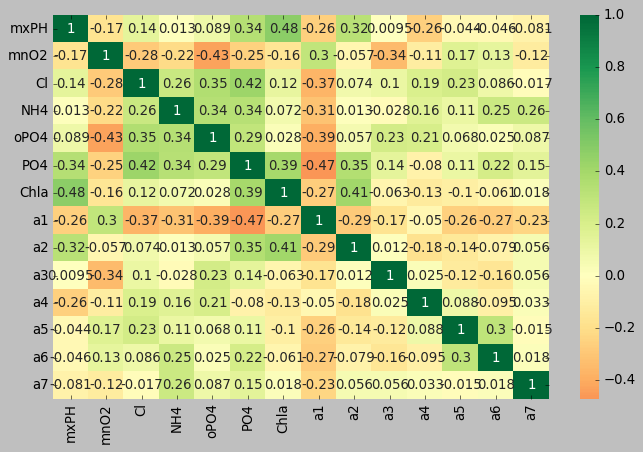

In [41]:
Xy_train_corr = Xy_train.corr()
plt.figure(figsize=favorable_figsize)
sns.heatmap(Xy_train_corr,
           xticklabels = Xy_train_corr.columns,
            yticklabels = Xy_train_corr.columns,
            cmap = 'RdYlGn',
            center = 0,
            annot = True)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## 脏数据处理

可以看得出来，里边有些写法不大规范，例如small\_、high\__等，我们可以看一下前三列的具体取值情况

In [42]:
for c in ['season', 'size', 'speed']:
    print(Xy_train[c].unique())

['winter' 'spring' 'autumn' 'summer']
['small_' 'medium' 'large_']
['medium' 'high__' 'low___']


In [43]:
to_replace = {'small_': 'small',
              'large_': 'large',
              'high__': 'high',
              'low___': 'low'}
Xy_train.replace(to_replace, inplace=True)

重新确认一下数据格式正确：

In [44]:
for c in ['season', 'size', 'speed']:
    print(Xy_train[c].unique())

['winter' 'spring' 'autumn' 'summer']
['small' 'medium' 'large']
['medium' 'high' 'low']


In [45]:
Xy_train.describe()

,mxPH,mnO2,Cl,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
count,199.000000,198.000000,190.000000,198.000000,198.000000,198.000000,188.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,183.000000
mean,8.011734,9.117778,43.636279,154.447197,83.325566,111.550601,13.540729,16.863000,6.934500,4.729500,1.884500,5.630000,5.19950,2.506011
std,0.598305,2.391253,46.831311,180.011263,116.783202,102.213943,20.447886,21.348257,10.807868,7.491957,4.005324,9.851475,9.53247,5.303743
min,5.600000,1.500000,0.222000,5.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.700000,7.725000,10.981250,35.625000,16.000000,19.394500,2.000000,1.475000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,8.060000,9.800000,32.730000,99.666500,41.400000,84.500000,5.200000,7.400000,2.100000,1.750000,0.000000,1.900000,0.00000,0.000000
75%,8.400000,10.800000,57.823500,203.727508,102.249750,182.156508,18.300000,24.075000,9.075000,6.150000,2.225000,7.700000,6.72500,2.400000
max,9.700000,13.400000,391.500000,931.833010,771.599980,558.750000,110.456000,89.800000,72.600000,44.600000,35.600000,77.600000,52.50000,31.600000


In [46]:
Xy_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mxPH,199.0,8.011734,0.598305,5.600,7.70000,8.0600,8.400000,9.70000
mnO2,198.0,9.117778,2.391253,1.500,7.72500,9.8000,10.800000,13.40000
Cl,190.0,43.636279,46.831311,0.222,10.98125,32.7300,57.823500,391.50000
NH4,198.0,154.447197,180.011263,5.000,35.62500,99.6665,203.727508,931.83301
oPO4,198.0,83.325566,116.783202,1.000,16.00000,41.4000,102.249750,771.59998
PO4,198.0,111.550601,102.213943,0.900,19.39450,84.5000,182.156508,558.75000
Chla,188.0,13.540729,20.447886,0.000,2.00000,5.2000,18.300000,110.45600
a1,200.0,16.863000,21.348257,0.000,1.47500,7.4000,24.075000,89.80000
a2,200.0,6.934500,10.807868,0.000,0.00000,2.1000,9.075000,72.60000
a3,200.0,4.729500,7.491957,0.000,0.00000,1.7500,6.150000,44.60000


看得出来，NO3并未作为数值型对待，这证明在前面导入数据的时候，可能有问题。我们需要重新审视我们导入的数据，这种反复的过程，在数据挖掘的实践过程中会经常碰到

In [47]:
Xy_train.dtypes

season     object
size       object
speed      object
mxPH      float64
mnO2      float64
Cl        float64
NO3        object
NH4       float64
oPO4      float64
PO4       float64
Chla      float64
a1        float64
a2        float64
a3        float64
a4        float64
a5        float64
a6        float64
a7        float64
dtype: object

果然，NO3并不是我们期望的float64，我们来看看具体的取值情况。

In [48]:
Xy_train.NO3.unique()

array(['6.23800', '1.28800', '5.33000', '2.30200', '10.41600', '9.24800',
       '1.53500', '4.99000', '0.88600', '1.39000', '1.52700', '1.58800',
       '1.22300', '1.47000', '1.44800', '1.32000', '1.42000', '1.44300',
       '1.71800', '2.822008777.59961', '4.825001729.00000', '0.64200',
       '2.94200', '1.71500', '1.51000', '3.97600', '1.57200', '0.63000',
       '0.73000', '0.23000', '3.33000', '3.78000', '3.02000',
       '2.818003515.00000', '0.050006400.00000', '3.444001911.00000',
       '0.73500', '0.81000', '3.41400', '4.07100', '6.09600', '3.82900',
       '8.54300', '7.83000', '4.55500', '4.87000', '4.53500', '3.07000',
       '4.50800', '1.65100', '1.17200', '0.91000', '3.24500', '2.22000',
       '2.55000', '2.64000', '4.17000', '5.97000', nan, '1.32800',
       '1.20300', '1.47400', '0.77000', '0.92300', '1.20800',
       '0.921001386.25000', '1.051002082.85010', '1.720002167.37012',
       '3.85000', '9.08000', '3.77300', '3.31600', '5.16400', '1.28700',
       '0.658

容易看得出来，里边有类似于3.561001168.00000、3.923001081.66003这样的数据。一个简单的处理办法就是舍弃其后八位，代码如下：

In [49]:
Xy_train['NO3'] = Xy_train.NO3.apply(lambda x: str(x) if len(str(x)) <= 7 else str(x)[0:7])

In [50]:
Xy_train.NO3

0      6.23800
1      1.28800
2      5.33000
3      2.30200
4      10.4160
        ...   
195    3.83300
196    3.20000
197    2.97800
198        nan
199    2.80000
Name: NO3, Length: 200, dtype: object

In [51]:
Xy_train['NO3'] = Xy_train.NO3.str.slice(0, 7).astype('float')

In [52]:
for c in list(set(cols_X) - set(cols_dummy)):
    Xy_train[c].astype('float')

In [53]:
Xy_train.describe()

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
count,199.000000,198.000000,190.000000,198.000000,198.000000,198.000000,198.000000,188.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,183.000000
mean,8.011734,9.117778,43.636279,3.282389,154.447197,83.325566,111.550601,13.540729,16.863000,6.934500,4.729500,1.884500,5.630000,5.19950,2.506011
std,0.598305,2.391253,46.831311,3.776474,180.011263,116.783202,102.213943,20.447886,21.348257,10.807868,7.491957,4.005324,9.851475,9.53247,5.303743
min,5.600000,1.500000,0.222000,0.050000,5.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.700000,7.725000,10.981250,1.296000,35.625000,16.000000,19.394500,2.000000,1.475000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,8.060000,9.800000,32.730000,2.675000,99.666500,41.400000,84.500000,5.200000,7.400000,2.100000,1.750000,0.000000,1.900000,0.00000,0.000000
75%,8.400000,10.800000,57.823500,4.446250,203.727508,102.249750,182.156508,18.300000,24.075000,9.075000,6.150000,2.225000,7.700000,6.72500,2.400000
max,9.700000,13.400000,391.500000,45.650000,931.833010,771.599980,558.750000,110.456000,89.800000,72.600000,44.600000,35.600000,77.600000,52.50000,31.600000


## 缺失值处理

查看数据的缺失情况：

In [54]:
pd.isnull(Xy_train)

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False


In [55]:
pd.isnull(Xy_train).any()

season    False
size      False
speed     False
mxPH       True
mnO2       True
Cl         True
NO3        True
NH4        True
oPO4       True
PO4        True
Chla       True
a1        False
a2        False
a3        False
a4        False
a5        False
a6        False
a7         True
dtype: bool

In [56]:
pd.notnull(Xy_train)

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
196,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
197,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
198,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True


每一列有多少缺失：

In [57]:
pd.notnull(Xy_train).all()

season     True
size       True
speed      True
mxPH      False
mnO2      False
Cl        False
NO3       False
NH4       False
oPO4      False
PO4       False
Chla      False
a1         True
a2         True
a3         True
a4         True
a5         True
a6         True
a7        False
dtype: bool

In [58]:
Xy_train.isnull().sum()

season     0
size       0
speed      0
mxPH       1
mnO2       2
Cl        10
NO3        2
NH4        2
oPO4       2
PO4        2
Chla      12
a1         0
a2         0
a3         0
a4         0
a5         0
a6         0
a7        17
dtype: int64

下面这种方法也可以：

In [59]:
Xy_train.apply(lambda x: x.isnull().sum())

season     0
size       0
speed      0
mxPH       1
mnO2       2
Cl        10
NO3        2
NH4        2
oPO4       2
PO4        2
Chla      12
a1         0
a2         0
a3         0
a4         0
a5         0
a6         0
a7        17
dtype: int64

当然，也可以直接绘制缺失数量的柱状图：

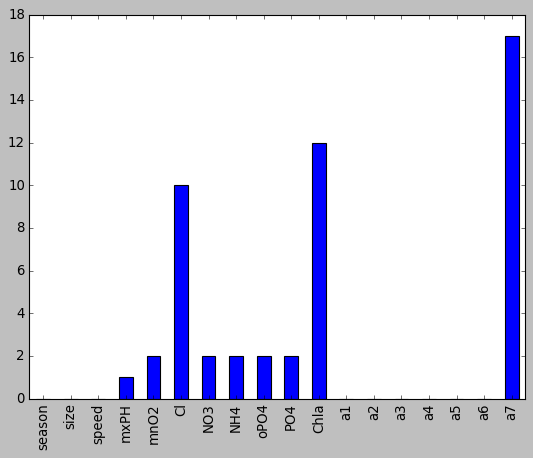

In [60]:
Xy_train.apply(lambda x: x.isnull().sum()).plot(kind = 'bar')

看看总共有多少缺失：

In [61]:
Xy_train.isnull().sum().sum()

50

查看每一列的缺失值情况：

In [62]:
Xy_train.count()

season    200
size      200
speed     200
mxPH      199
mnO2      198
Cl        190
NO3       198
NH4       198
oPO4      198
PO4       198
Chla      188
a1        200
a2        200
a3        200
a4        200
a5        200
a6        200
a7        183
dtype: int64

处理缺失数据最简单的方法就是：将包含确实数据的特征（列）或者样本（行）从数据集中删除。可通过dropna方法来删除数据集中包含缺失值的行，或者将axis参数设为1，以删除数据集中至少包含一个NaN值的列

In [63]:
Xy_train_dropna = Xy_train.dropna()

In [64]:
Xy_train_dropna.count()

season    167
size      167
speed     167
mxPH      167
mnO2      167
Cl        167
NO3       167
NH4       167
oPO4      167
PO4       167
Chla      167
a1        167
a2        167
a3        167
a4        167
a5        167
a6        167
a7        167
dtype: int64

数据由200行变成了167行，直接剔除掉这16.5%的数据，并不合适。

缺失值填补有很多的方法，最常用的插值技术之一就是均值插补（mean inputation），即使用相应的特征均值来替换缺失值。

In [65]:
for column in list(Xy_train.columns[Xy_train.isnull().sum() > 0]):
    mean_val = Xy_train[column].mean()
    Xy_train[column].fillna(mean_val, inplace=True)

当然，也可以直接用scikit-learn中的Impute类方便地实现：

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean',axis=0)

imr = imr.fit(Xy_train[cols_numeric])

imputed_data = imr.transform(Xy_train.values)

imputed_data

首先计算各特征列的均值，然后使用相应的特征均值对NaN进行替换。如果我们把参数axis＝0改为axis＝1，则用每行的均值来进行相应的替换。参数strategy的可选项还有median或者most_frequent，后者代表使用对应行或列中出现频次最高的值来替换缺失值，常用于填充类别特征值。

In [66]:
Xy_train.apply(lambda x: x.isnull().sum())

season    0
size      0
speed     0
mxPH      0
mnO2      0
Cl        0
NO3       0
NH4       0
oPO4      0
PO4       0
Chla      0
a1        0
a2        0
a3        0
a4        0
a5        0
a6        0
a7        0
dtype: int64

当然，缺失值处理作为数据挖掘实践中在正常不过的事情，自然会有很多第三方包实现其中一些经典算法：

In [67]:
#from sklearn.preprocessing import Imputer
#imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
#imr = imr.fit(Xy_train)
#imputed_data = imr.transform(Xy_train)
#imputed_data

pandas里边涉及到的一些缺失值相关的函数：  
* isnull(): Generate a boolean mask indicating missing values
* notnull(): Opposite of isnull()
* dropna(): Return a filtered version of the data
* fillna(): Return a copy of the data with missing values filled or imputed

## 哑元变量

In [68]:
Xy_train.columns

Index(['season', 'size', 'speed', 'mxPH', 'mnO2', 'Cl', 'NO3', 'NH4', 'oPO4',
       'PO4', 'Chla', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7'],
      dtype='object')

In [69]:
cols_dummy = ['season', 'size', 'speed']
for dv in cols_dummy:
    dummies = pd.get_dummies(Xy_train.loc[:, dv], prefix = dv) 
    Xy_train = pd.concat([Xy_train, dummies], axis = 1 )

In [70]:
Xy_train.head()

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,...,season_autumn,season_spring,season_summer,season_winter,size_large,size_medium,size_small,speed_high,speed_low,speed_medium
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,...,0,0,0,1,0,0,1,0,0,1
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,...,0,1,0,0,0,0,1,0,0,1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,...,1,0,0,0,0,0,1,0,0,1
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,...,0,1,0,0,0,0,1,0,0,1
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,...,1,0,0,0,0,0,1,0,0,1


In [71]:
Xy_train = Xy_train.drop(cols_dummy, axis = 1)
Xy_train.head()

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,...,season_autumn,season_spring,season_summer,season_winter,size_large,size_medium,size_small,speed_high,speed_low,speed_medium
0,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1
1,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,...,0,1,0,0,0,0,1,0,0,1
2,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,...,1,0,0,0,0,0,1,0,0,1
3,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,...,0,1,0,0,0,0,1,0,0,1
4,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,...,1,0,0,0,0,0,1,0,0,1


In [72]:
X_train = Xy_train.copy()
X_train = X_train.drop(cols_y, axis = 1)

In [73]:
y_train = Xy_train['a1']

## 变量的重要性

In [74]:
from sklearn.tree import DecisionTreeRegressor

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp.plot( kind = 'barh' )
    print (model.score( X , y ))

def plot_variable_importance(X, y):
    tree = DecisionTreeRegressor(random_state=99)
    tree.fit(X, y)
    plot_model_var_imp(tree, X, y)

1.0


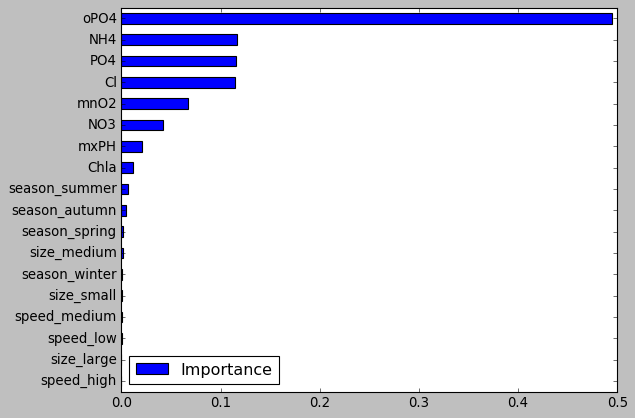

In [75]:
plot_variable_importance(X_train, y_train)

## 测试集上相应的处理

将high__、small_中多余的下划线剔除：

In [76]:
for c in ['season', 'size', 'speed']:
    print(Xy_test[c].unique())

['summer' 'winter' 'spring' 'autumn']
['small_' 'medium' 'large_']
['medium' 'high__' 'low___']


In [77]:
to_replace = {'small_': 'small',
              'large_': 'large',
              'high__': 'high',
              'low___': 'low'}
Xy_test.replace(to_replace, inplace=True)

In [78]:
for c in ['season', 'size', 'speed']:
    print(Xy_test[c].unique())

['summer' 'winter' 'spring' 'autumn']
['small' 'medium' 'large']
['medium' 'high' 'low']


Xy_test['NO3']类型转换：

In [79]:
Xy_test['NO3'] = Xy_test.NO3.apply(lambda x: str(x) if len(str(x)) <= 7 else str(x)[0:7])

In [80]:
Xy_test['NO3'] = Xy_test.NO3.str.slice(0, 7).astype('float')

缺失值处理：

In [81]:
for column in list(Xy_test.columns[Xy_test.isnull().sum() > 0]):
    mean_val = Xy_train[column].mean()
    Xy_test[column].fillna(mean_val, inplace=True)

In [82]:
Xy_test.apply(lambda x: x.isnull().sum())

season    0
size      0
speed     0
mxPH      0
mnO2      0
Cl        0
NO3       0
NH4       0
oPO4      0
PO4       0
Chla      0
a1        0
a2        0
a3        0
a4        0
a5        0
a6        0
a7        0
dtype: int64

哑元变量处理：

In [83]:
cols_dummy = ['season', 'size', 'speed']
for dv in cols_dummy:
    dummies = pd.get_dummies(Xy_test.loc[:, dv], prefix = dv) 
    Xy_test = pd.concat([Xy_test, dummies], axis = 1 )
Xy_test = Xy_test.drop(cols_dummy, axis = 1)

In [84]:
X_test = Xy_test.drop(cols_y, axis = 1)

In [85]:
y_test = Xy_test['a1']

## 保存数据

In [86]:
import pickle
objects_to_be_saved = {'X_train': X_train,
                       'y_train': y_train,
                       'X_test': X_test,
                       'y_test': y_test}
with open('pickle/ch6_data.pkl', 'wb') as f:
    pickle.dump(objects_to_be_saved, f)

# 算法建模

## 准备工作

加载相关的包

In [87]:
import os
import time
import itertools

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

绘图设置：

In [88]:
plt.style.use("seaborn-darkgrid")
favorable_figsize = (10, 6)
%matplotlib inline

设定随机状态种子，结果可复现：

In [89]:
rng = np.random.RandomState(2012)

解决中文显示问题:

In [90]:
plt.rcParams['font.sans-serif'] = ['FangSong']  # 制定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

本实验将大量采用sklern模块。由于sklearn新旧版本0.18.0前后版本差别较大，请确认一下目前所用的版本。

In [91]:
import sklearn
sklearn.__version__

'0.22.1'

In [92]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
Version(sklearn_version)

LooseVersion ('0.22.1')

忽略掉一些警告，保持界面整洁：

In [93]:
import warnings
warnings.filterwarnings("ignore")

读取保存的数据：

In [94]:
import pickle
with open('pickle/ch6_data.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
X_train = objects_awaken['X_train']
y_train = objects_awaken['y_train']
X_test = objects_awaken['X_test']
y_test = objects_awaken['y_test']

In [95]:
from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

上述代码对特征进行了归一化处理。实际上，对于大部分机器学习任务而言，归一化都是数据预处理一个必备环节，对于线性回归、KNN、SVM、神经网络等，都有必要进行归一化处理，以利于提高求解速度和预测精度。

## 模型评估

在数据分析领域，有一个最基本的理念：All models are wrong, but some are useful!。作为数据分析工程师，需要做的事情，就是从众多模型候选集中，选出最逼近真实情况（历史数据）的那一个！

对于回归问题而言，评估的指标很多，比如：

* [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
* [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)
* [explained_variance_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score)
* [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).

本实验将可决系数作为评估指标：  
${R^2}\left( {y,\hat y} \right) = 1 - \frac{{\sum\nolimits_{i = 0}^{n - 1} {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\nolimits_{i = 0}^{n - 1} {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}$

In [96]:
from sklearn import metrics
def model_eval(y, yhat):
    plt.figure(figsize=favorable_figsize)
    plt.scatter(y, yhat, color='y', marker='o')
    plt.scatter(y, y,color='g', marker='+')
    print("MSE:", metrics.mean_squared_error(y, yhat))
    print("R2:", metrics.r2_score(y, yhat))    

## 多元线性回归

线性回归是最为经典模型之一，在几乎任何一本统计、数据挖掘的书籍中，都离不开它的身影 。如果自变量只有一个，称之为简单线性回归或一元线性回归（univariate linear regression）；若自变量不止一个，称之为多元线性回归。  
线性模型当然是最为简单的模型之一，但simplity不代表naïve或是low.  
《The LION Way: Machine Learning Plus Intelligent Optimization》：  
> The truth is never linear!  
> Or almost never!  
> But often the linearity assumption is good enough .

多元线性回归的原理可以从多个角度切入，常见的是最小二乘的方法，原理如下：  
![img](figtabs/ch7/ols.png)
自然界是以最省力的方式运行的，用最小二乘来拟合一条直线，其道理也差不多，也符合能量最小这一自然美学原理。说白了，也就是要所有的弹簧，加起来的长度最短。需要注意的是，这里弹簧的长度，并非数据点到直线的距离。因为我们关注的是实际的y取值与预测出来的y值之间的差异。差异越小，证明模型预测的效果越好。所以我们关注的当然是y轴方向上的差别了。预测值与实际值之差有正有负，因此一般用平方和来表达总体差异。直线有无穷多条，我们想要的那一条，是差值平方和最小的那一条。换一句相对正式的话讲，我们所作的回归分析，是最小平方回归。用更加高大上一点的说法，可以美其名曰最小二乘回归（Least Squares Regression）。这里所谓的二乘，其实就是平方。我们现在说平方，古代数学称之为二乘。所谓的最小二乘，便是“最小平方”，从英文Least Squares也可以印证这一点。聪明的小伙伴肯定也想到了，既然可以用平方和来作为最合适直线的选择标准，应该也可以用绝对值之和来选择呀。没错，假如是绝对值之和的话，我们称之为最小一乘回归。有最小二乘、最小一乘，是否有最小零乘。还真有，感兴趣的同学，可以查找相关资料自行品读。  
下面用数学语言简单表述一下最小二乘回归：  
设有观测值$\left( {{X_1},{y_1}} \right),\left( {{X_2},{y_2}} \right), \cdots ,\left( {{X_n},{y_n}} \right)$，回归模型为：  
${y_i} = \alpha  + {\beta _1}{x_1} +  \cdots  + {\beta _p}{x_p} + {\varepsilon _i}$  
有了拟合直线之后，实际值${y_i}$与预测值$\hat y$之差${e_i} = {y_i} - {\hat y_i}$称之为残差。  
最小二乘回归就是要使残差平方和最小：sum of squared residuals, sum of squared errors或residual sum of squares，简称SSE或RSS。  
$SSE = \sum\limits_{i = 1}^n {e_i^2}  = \sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}}$  
参数估计的过程，也就是模型学习的过程：  
$\left( {{{\hat \alpha }^{(ols)}},{{\hat \beta }^{(ols)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2}}$

In [97]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
print (regr.coef_)
print (regr.intercept_)

[-0.97402023  2.55639363 -1.15209666 -3.43731497 -1.4128513  -4.34174154
 -5.52156469 -1.86399138 -0.8326542   0.79861112 -1.0846609   0.9374046
 -2.56971089 -0.38861237  2.64333036 -0.60076774  1.12910621 -0.24879795]
16.863


MSE: 273.89248130335574
R2: 0.3449061483574395


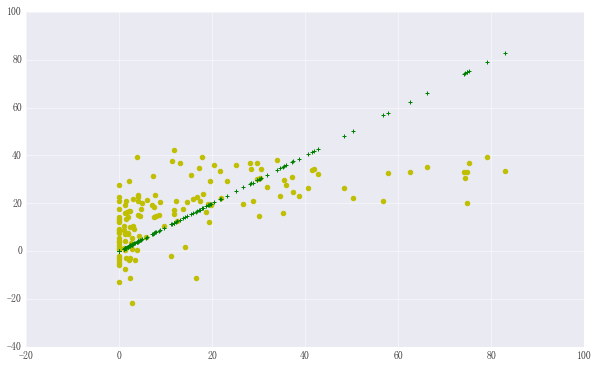

In [99]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

## 岭回归

基于普通最小二乘进行线性回归时，估计参数为：  
$\left( {{{\hat \alpha }^{(ols)}},{{\hat \beta }^{(ols)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2}}$ <br>
而岭回归，则是要增加一个惩罚项，来约束系数的大小，即：  
$\left( {{{\hat \alpha }^{(ridge)}},{{\hat \beta }^{(ridge)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2} + \lambda \sum\limits_{j = 1}^p {\beta _j^2} }$  
这里边涉及到$\lambda$值的确定的问题，一般通过交叉验证等方法确定。

In [100]:
from sklearn.linear_model import Ridge,RidgeCV

In [101]:
regr = Ridge(alpha=0.5)
regr.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:
print('系数矩阵:\n',regr.coef_)
print('线性回归模型:\n',regr)

系数矩阵:
 [-0.98061675  2.5462898  -1.1582065  -3.43064906 -1.41705398 -4.3313961
 -5.50224228 -1.85964487 -0.82675626  0.79318093 -1.0823167   0.93536879
 -2.55874207 -0.39223116  2.63749082 -0.59024563  1.11716562 -0.25034276]
线性回归模型:
 Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


MSE: 273.7594003252733
R2: 0.3452244503790852


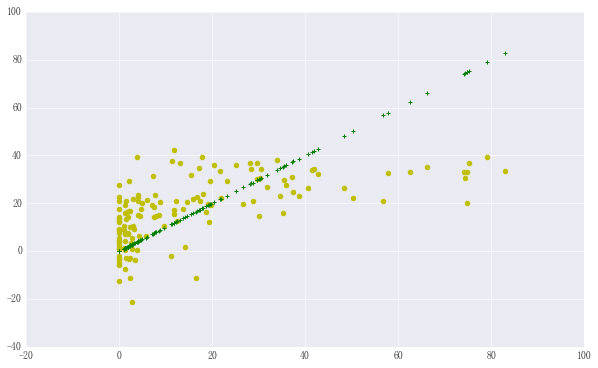

In [103]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

In [104]:
regr_cv = RidgeCV(cv=10).fit(X_train, y_train)

In [105]:
regr_cv.alpha_

10.0

MSE: 271.7170879562041
R2: 0.3501092368096733


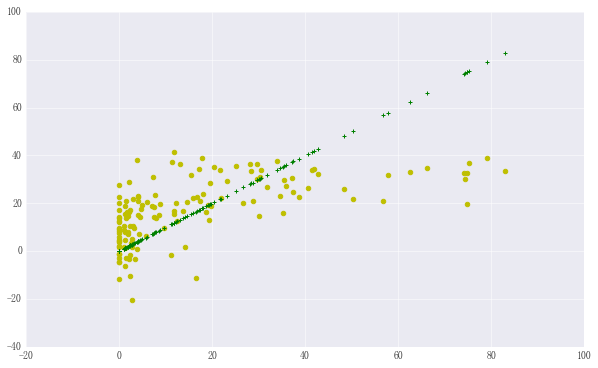

In [106]:
y_test_pred = regr_cv.predict(X_test)
model_eval(y_test, y_test_pred)

下边这种方法可行否？

In [107]:
n_alphas = 100
alphas = np.logspace(-2, 2, n_alphas)

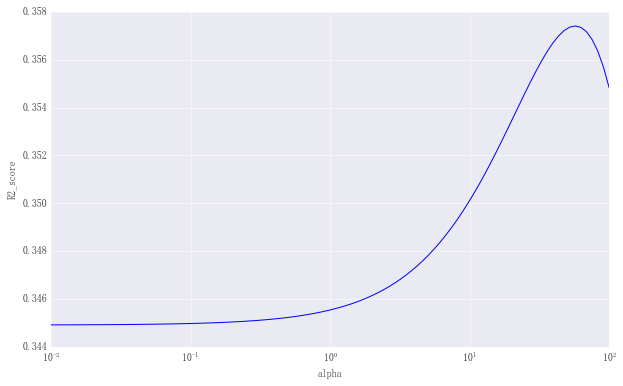

In [108]:
r2_scores = []
for a in alphas:
    regr = Ridge(alpha=a)
    regr.fit(X_train, y_train)
    y_test_pred = regr.predict(X_test)
    r2_scores.append(metrics.r2_score(y_test, y_test_pred))

plt.figure(figsize=favorable_figsize)
ax = plt.gca()

ax.plot(alphas, r2_scores)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.show()

MSE: 268.66373029379497
R2: 0.35741223330666205


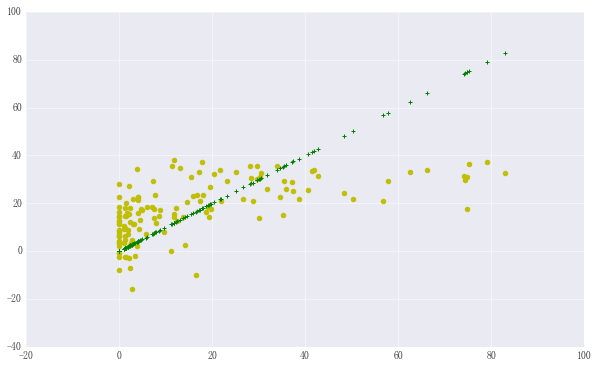

In [109]:
best_alpha = alphas[np.where(np.array(r2_scores) == np.array(r2_scores).max())]
bst_reg = Ridge(alpha=best_alpha)
bst_reg.fit(X_train, y_train)
y_test_pred = bst_reg.predict(X_test)
model_eval(y_test, y_test_pred)

## LASSO回归

LASSO回归原理上与岭回归有些类似，只不过其中的惩罚项不是系数的平方，而是取其绝对值，满足：<br>  
$\left( {{{\hat \alpha }^{(lasso)}},{{\hat \beta }^{(lasso)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2} + \lambda \sum\limits_{j = 1}^p {\left| {{\beta _j}} \right|} }$   
这里边涉及到$\lambda$的确定的问题，一般通过交叉验证等方法确定。

In [110]:
from sklearn.linear_model import Lasso
regr = Lasso(alpha=0.01)

In [111]:
regr.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

MSE: 273.601373935394
R2: 0.3456024166376497


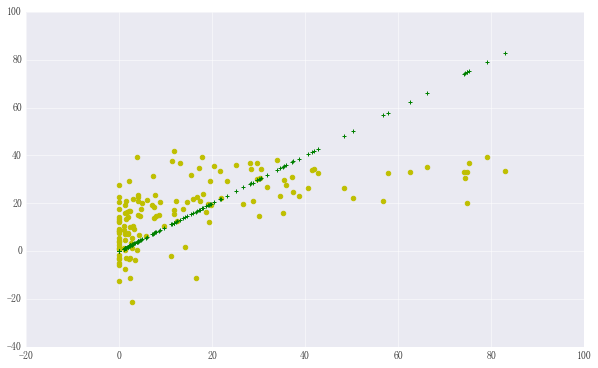

In [112]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

(-1.0015677385442059,
 3.998432261455794,
 63.100195692659426,
 1241.5113984567902)

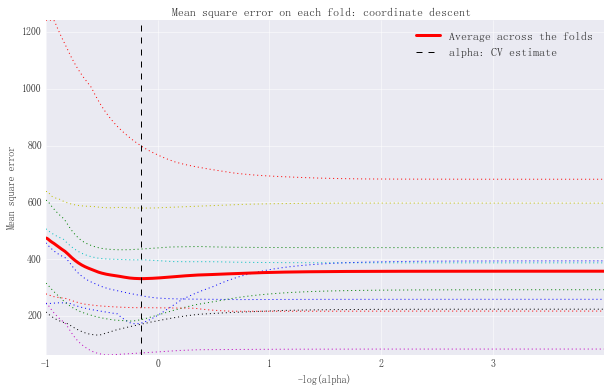

In [113]:
from sklearn.linear_model import LassoCV
regr_cv = LassoCV(cv=10, eps=1e-5, n_alphas=500).fit(X_train, y_train)

# Display results
m_log_alphas = -np.log10(regr_cv.alphas_)

plt.figure(figsize=favorable_figsize)
plt.plot(m_log_alphas, regr_cv.mse_path_, ':')
plt.plot(m_log_alphas, regr_cv.mse_path_.mean(axis=-1), 'red',
         label='Average across the folds', linewidth=3)
plt.axvline(-np.log10(regr_cv.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

In [114]:
regr_cv.alpha_

1.4120963541337583

MSE: 269.074316737368
R2: 0.3564301959266195


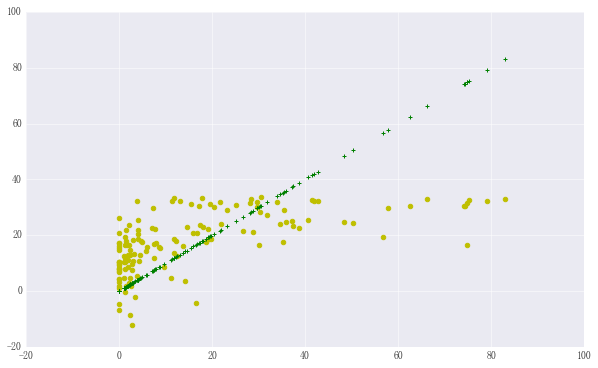

In [115]:
y_test_pred = regr_cv.predict(X_test)
model_eval(y_test, y_test_pred)

除了以上两种正则化方法之外，还有所谓的弹性网络（ElasticNet），介于 Ridge 回归和 Lasso 回归之间。它的正则项是 Ridge 回归和 Lasso 回归正则项的简单混合，同时你可以控制它们的混合率$r$，当$r{\rm{ = }}0$时，弹性网络就是 Ridge 回归，当$r{\rm{ = 1}}$时，其就是 Lasso 回归。  
$\left( {{{\hat \alpha }^{(ElasticNet)}},{{\hat \beta }^{(ElasticNet)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2} + r \times \lambda \sum\limits_{j = 1}^p {\left| {{\beta _j}} \right|}  + \frac{{1 - r}}{2}\lambda \sum\limits_{j = 1}^p {\beta _j^2} } $


MSE: 270.7143592942868
R2: 0.35250755522338795


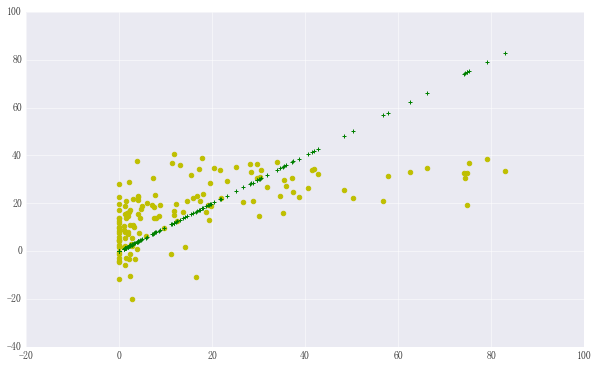

In [116]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=0.1, l1_ratio=0.5)
regr.fit(X_train, y_train)
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

## 回归树

决策树用于回归时称为回归树（regression tree），用于分类时称为分类树（classification tree）——正如前一个实验《获胜球队预测中》所示，其原理也大同小异。下面看一下在sklearn中的具体实现。

In [117]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=2)

In [118]:
regr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MSE: 281.3880523396936
R2: 0.3269783013530654


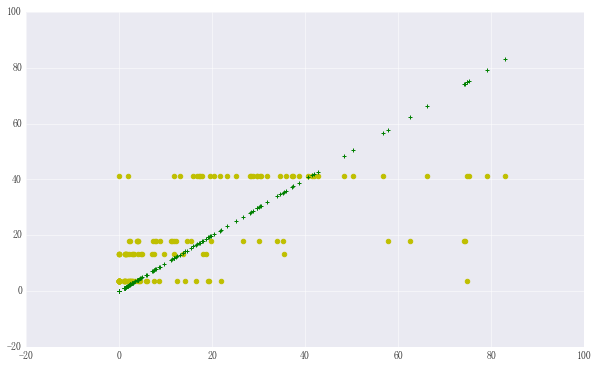

In [119]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

对回归树进行可视化：

def print_graph(clf, feature_names=None):
    """Print decision tree."""
    graph = tree.export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=True, 
        out_file=None, 
        feature_names=feature_names,
        class_names={0: "D", 1: "R"},
        filled=True,
        special_characters=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)  
    return Image(graph.create_png())
print_graph(regr)

当然，前面的参数设置比较随意，我们可以通过格子店搜索的方法，进行参数寻优：

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae", "friedman_mse"],
              "min_samples_split": [5, 10, 20],
              "max_depth": [1, 2, 3, 4, 5, 6, 7]}
regr = DecisionTreeRegressor()
regr_grid_cv = GridSearchCV(regr, param_grid, cv=5)
regr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                        

In [121]:
regr_grid_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MSE: 281.38805233969356
R2: 0.3269783013530655


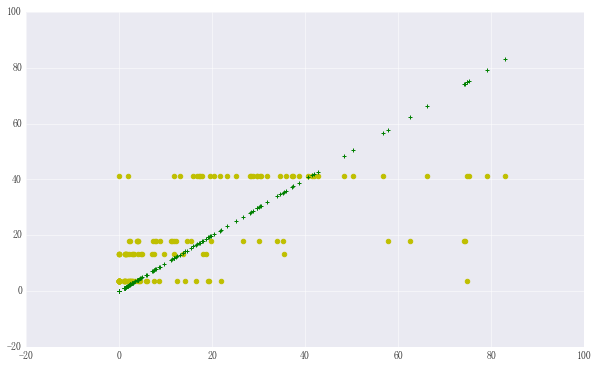

In [122]:
y_test_pred = regr_grid_cv.predict(X_test)
model_eval(y_test, y_test_pred)

## Bagging

bagging得名于Bootstrap AGGregatING，直译为中文应该是“自助聚集”。<br>
原理示意如下：<br>
<img src=figtabs/ch7/bagging.png align=center width=50% height=50% />

bagging算法原理如下：<br>
<img src=figtabs/ch7/bagging_alg.png align=left width=40% height=40%>

MSE: 202.07011654306584
R2: 0.5166903073858267


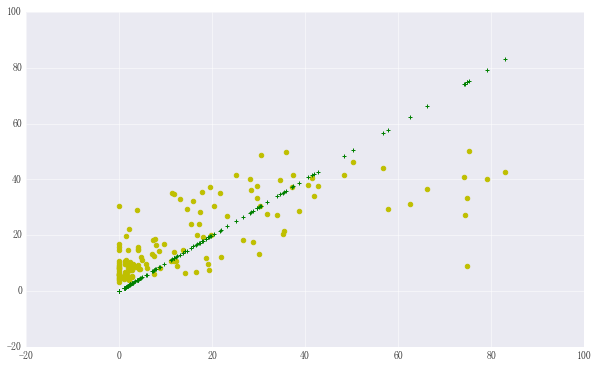

In [123]:
from sklearn.ensemble import BaggingRegressor

base_regr = DecisionTreeRegressor(max_depth=9)
bagging = BaggingRegressor(base_estimator=base_regr, n_estimators=1000, max_samples=1.0, max_features=0.35)
bagging.fit(X_train, y_train)
y_test_pred = bagging.predict(X_test)
model_eval(y_test, y_test_pred)
#0.532316943003849

In [124]:
#import pickle
#bagging1_state_of_art = {'bagging1':bagging1}
#with open('pickle/bagging1_state_of_art.pkl', 'wb') as f:
#    pickle.dump(bagging1_state_of_art, f)   

MSE: 195.53667405522694
R2: 0.532316943003849


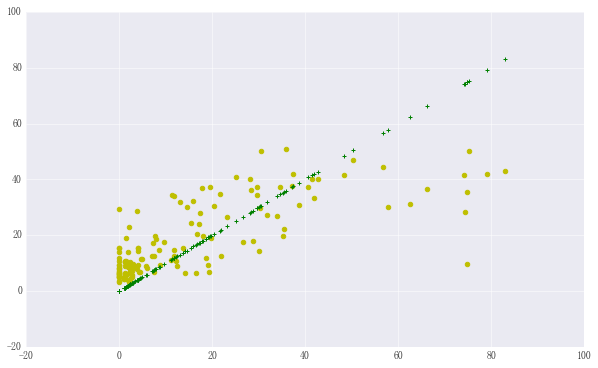

In [125]:
import pickle
with open('pickle/bagging1_state_of_art.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
bagging1_awaken = objects_awaken['bagging1']

y_test_pred = bagging1_awaken.predict(X_test)
model_eval(y_test, y_test_pred)

## RandomForest

先尝试一下前述实验中已经用过的随机森林：

MSE: 200.79563412523666
R2: 0.5197386042648554


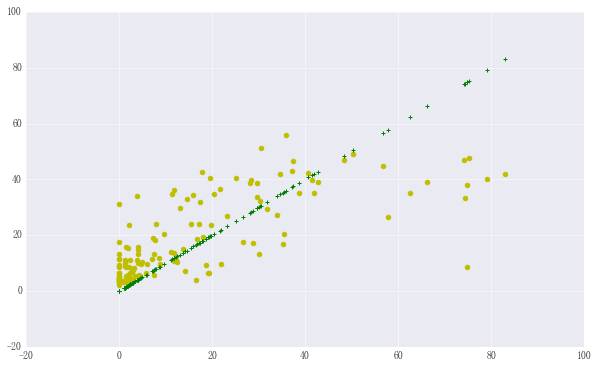

In [126]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=9,
                            max_features=0.25,
                            random_state=rng,
                            n_estimators=500)
regr.fit(X_train, y_train)
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)
##0.5286474049642765

In [127]:
#import pickle
#rf_state_of_art = {'rf':reg}
#with open('pickle/rf_state_of_art.pkl', 'wb') as f:
#    pickle.dump(rf_state_of_art, f)  

MSE: 197.07089526089925
R2: 0.5286474049642765


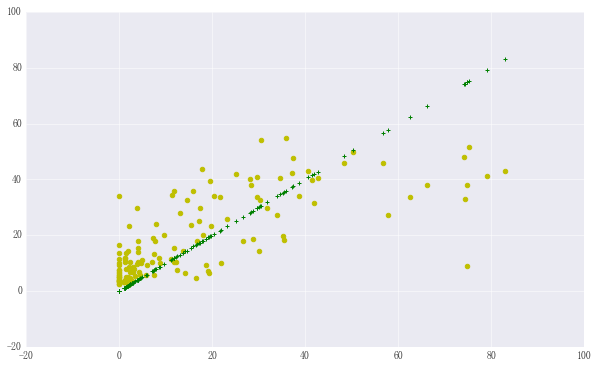

In [128]:
import pickle
with open('pickle/rf_state_of_art.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
rf_awaken = objects_awaken['rf']

y_test_pred = rf_awaken.predict(X_test)
model_eval(y_test, y_test_pred)

## Boosting

AdaBoost方法是属于组合方法的一种学习算法。事实上对于这种类型的算法，它们的预测值是通过对一组基本模型的预测值进行某种形式的组合而形成的。AdaBoost方法应用一种自适应增强方法来得到一组基本模型。假如它比随机分类器好，那么增强方法是一种常见的提髙基本算法性能的方法。AdaBoost模型是通过序贯方式来获取的。序列的每一个新成员都是通过提高序列中前一个模型的误差率来获得的它通过一种加权模式来提离模型性能：它增加被前一个模型误分类的样本的权重，这意味着基本模型用于不同分布的训练集数据。经过以上过程的几次迭代，结果是一组在不同训练集数据上的基本模型。这个組合可以用于获得原始数据的甜试样本的预测值。对单个基本模型的预测值进行加权平均就可以得到组合预测值。权重的定义方式是，最大的权重赋给序列中最后得到的模型(理论上最小误差的模型）。

AdaBoost是adaptive boosting（自适应boosting）的缩写，其运行过程如下：<br>
训练数据中的每个样本，并赋予其一个权重，这些权重构成了向量$D$。一开始，这些权重都初始化成相等值。首先在训练数据上训练出一个弱分类器并计算该分类器的错误率，然后在同一数据集上再次训练弱分类器。在分类器的第二次训练当中，将会重新调整每个样本的权重，其中第一次分对的样本的权重将会降低，而第一次分错的样本的权重将会提高。为了从所有弱分类器中得到最终的分类结果，AdaBoost为每个分类器都分配了一个权重值$\alpha$，这些$\alpha$值是基于每个弱分类器的错误率进行计算的。<br>
<img src=figtabs/ch7/adaboost.png align=center width=50% height=50% />

其中$\alpha$的计算方法如下：<br>
$\alpha  = \frac{1}{2}\ln \left( {\frac{{1 - err\_rate}}{{err\_rate}}} \right)$<br>
计算$\alpha$之后，可以对权重向量$D$进行更新，以使得那些正确分类的样本的权重降低而错分样本的权重升高。$D$的计算方法如下：<br>
如果某个样本被正确分类：$D_i^{\left( {t + 1} \right)} = \frac{{D_i^{\left( t \right)}{e^{ - \alpha }}}}{{Sum\left( D \right)}}$<br>
如果某个样本被错误分类：$D_i^{\left( {t + 1} \right)} = \frac{{D_i^{\left( t \right)}{e^\alpha }}}{{Sum\left( D \right)}}$<br>
在计算出$D$之后，AdaBoost又开始进入下一轮迭代。AdaBoost算法会不断地重复训练和调整权重的过程，直到训练错误率为0或者弱分类器的数目达到用户的指定值为止。

具体算法如下：<br>
<img src=figtabs/ch7/adaboost.m1_alg.png align=left height=60% width=60% />

In [129]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators = 2000, random_state=rng)
regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

MSE: 196.61811291775717
R2: 0.5297303661602655


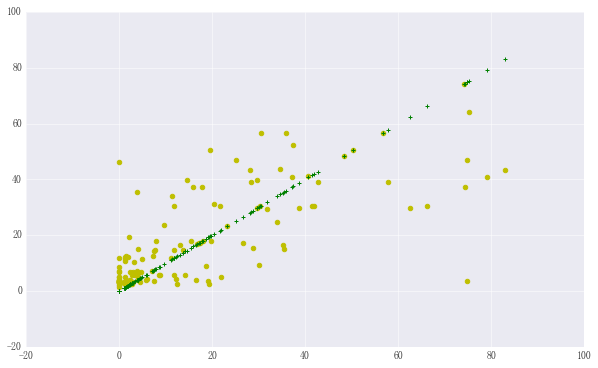

In [130]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)
#0.5442303540366082

In [131]:
#import pickle
#adaboost_state_of_art = {'adaboost':regr}
#with open('pickle/adaboost_state_of_art.pkl', 'wb') as f:
#    pickle.dump(adaboost_state_of_art, f)  

MSE: 190.55571796722876
R2: 0.5442303540366082


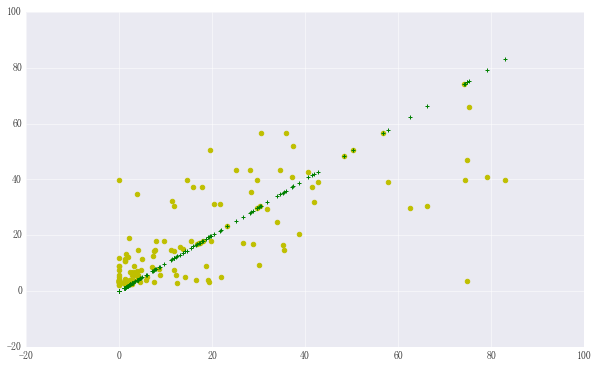

In [132]:
import pickle
with open('pickle/adaboost_state_of_art.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
adaboost_awaken = objects_awaken['adaboost']

y_test_pred = adaboost_awaken.predict(X_test)
model_eval(y_test, y_test_pred)

## Stacking

在集成方面，stacking与前述的简单多数投票、加权投票有所不同。在stacking中，所有的弱学习器被称作0级（0 level）学习器，他们的输出结果被一个1级（1 level）学习器接受，然后再输出最后的结果。<br>
其原理如下：<br>
<img src=figtabs/ch7/stacking.png align=center width=50% height=50%>

Stacking算法原理如下：<br>
<img src=figtabs/ch7/stacking_alg.png align=left width=40% height=40% />

In [133]:
z_scaler = StandardScaler()
y_train = z_scaler.fit_transform(np.reshape(y_train.values, (-1, 1)))
y_train = y_train[:, 0]

MSE: 195.89953035840637
R2: 0.5314490661928046


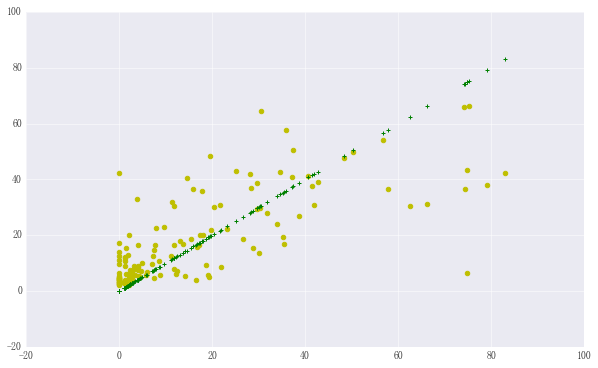

In [134]:
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR

lm = LinearRegression()
rg = Ridge(alpha=10)
ls = Lasso(alpha=1.4)
dt = DecisionTreeRegressor(max_depth=2)
bg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                      n_estimators=1000,
                      max_samples=1.0,
                      max_features=0.35)
rf = RandomForestRegressor(max_depth=9,
                           max_features=0.25,
                           random_state=rng,
                           n_estimators=500)

ab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                       n_estimators=2000, random_state=rng)

sv = SVR(kernel='rbf')

st = StackingRegressor(regressors=[lm, rg, ls, dt, bg, rf, ab],
                       meta_regressor=sv)
st.fit(X=X_train, y=y_train)
y_test_pred = st.predict(X_test)
model_eval(y_test, z_scaler.inverse_transform(y_test_pred))

模型存储与重载：\
```python

import pickle
stacking_state_of_art = {'st':st}
with open('pickle/stacking_state_of_art.pkl', 'wb') as f:
    pickle.dump(stacking_state_of_art, f) 

import pickle
with open('pickle/stacking_state_of_art.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
st_awaken = objects_awaken['st']
y_test_pred = st_awaken.predict(X_test)
```

MSE: 195.89953035840637
R2: 0.5314490661928046


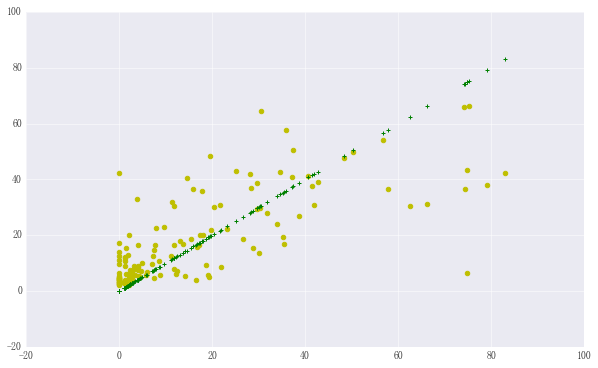

In [135]:
model_eval(y_test, z_scaler.inverse_transform(y_test_pred))

In [136]:
for regr, label in zip([lm, rg, ls, dt, 
                       bg, rf, ab, sv, st],
                      ['linear model', 'ridge', 'lasso', 'Decision Tree',
                       'bagging', 'randomforest', 'boosting', 'svr', 'stacking']):
    regr.fit(X=X_train, y=y_train)
    y_test_pred = regr.predict(X_test)
    cur_r2 = metrics.r2_score(y_test, z_scaler.inverse_transform(y_test_pred))
    print("R^2 Score: %0.5f  [%s]" % (cur_r2, label))

R^2 Score: 0.34491  [linear model]
R^2 Score: 0.35011  [ridge]
R^2 Score: -0.00050  [lasso]
R^2 Score: 0.32698  [Decision Tree]
R^2 Score: 0.52037  [bagging]
R^2 Score: 0.51744  [randomforest]
R^2 Score: 0.54209  [boosting]
R^2 Score: 0.37564  [svr]
R^2 Score: 0.53089  [stacking]


至此，我们对常见的一些组合学习方法进行了介绍，对于藻类数量的预测这个实际问题，组合学习方法相对于弱学习器，优势比较明显。当然，可能同学们对于${R^2}$最高仅为0.54209可能并不满意——毕竟很多问题的可决系数在0.9以上。我们很难说可决系数达到一个什么样的标准我们才能满意，不过至少我们知道，对于藻类数量预测这份数据而言，在其他的一些研究里，在比较多种模型之后${R^2}$最大值是 0.534962，如此看来，咱们的实验结果还是这些方法的基础上有所进步。<br>
> Luís Torgo. Data Mining with R Learning with Case Studies. CRC Press, 2011. pp.93

<!--NAVIGATION-->
<[学生文理分科](ch05_学生文理分科.ipynb) | [Contents](Index.ipynb) | [地理坐标异常检测](ch07_地理坐标异常检测.ipynb) >